In [1]:
import wandb
from wandb.keras import WandbCallback
wandb.init(project="LSTM seq 2048.", name="epoch 2000")

wandb: Currently logged in as: jintae. Use `wandb login --relogin` to force relogin


In [2]:
import pandas as pd

df = pd.read_csv('C:/Users/PARK/Desktop/Alcohol_Sales.csv')
print(df.head())

   DATE  Sales
0     0   3459
1     1   3458
2     2   4002
3     3   4564
4     4   4221


In [3]:
df.shape

(325, 2)

In [4]:
import numpy as np

data = df.to_numpy()

In [5]:
data.shape

(325, 2)

In [6]:
data[0:5]

array([[   0, 3459],
       [   1, 3458],
       [   2, 4002],
       [   3, 4564],
       [   4, 4221]], dtype=int64)

In [7]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# data = scaler.fit_transform(data)

In [8]:
data_mean = data.mean()
data_std = data.std()

data = (data - data_mean)/data_std

In [9]:
data[0:5]

array([[-0.9194862 , -0.12914209],
       [-0.91925771, -0.12937058],
       [-0.91902922, -0.00507246],
       [-0.91880073,  0.12333846],
       [-0.91857224,  0.04496667]])

In [10]:
train_input = []
train_label = []

data_len = 325
time_step = 100
out_dim = 25

for i in range(176):
    _input = data[i:i+time_step]
    _label = data[i+time_step:i+time_step+out_dim]
    
    train_input.append(_input)
    train_label.append(_label)
    

train_input = np.array(train_input)
train_label = np.array(train_label)
train_label = np.delete(train_label, 0, axis=2)


test_input = np.array(data[data_len-out_dim-time_step:data_len-out_dim])
test_label =np.array(data[300:325])
test_label = np.delete(test_label, 0, axis=1)

In [11]:
train_input.shape

(176, 100, 2)

In [12]:
train_label.shape

(176, 25, 1)

In [13]:
test_input.shape

(100, 2)

In [14]:
test_label.shape

(25, 1)

In [15]:
np.random.seed(10)
shuffled_indices = np.random.permutation(np.arange(train_input.shape[0]))
train_input = train_input[shuffled_indices, :, :]
train_label = train_label[shuffled_indices, :]

In [16]:
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.LSTM(2048, input_shape=(time_step,2)))
model.add(layers.Dense(25))

model.summary()

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(train_input, train_label, epochs=2000, verbose=1, shuffle=True, validation_split=0.20,
                   callbacks=[WandbCallback(log_weights=True, log_gradients=True, training_data=(train_input, train_label))])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 2048)              16801792  
                                                                 
 dense (Dense)               (None, 25)                51225     
                                                                 
Total params: 16,853,017
Trainable params: 16,853,017
Non-trainable params: 0
_________________________________________________________________


wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/2000
5/5 [==============================] - ETA: 0s - loss: 5.2505 - mae: 1.7956

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 11s 2s/step - loss: 5.2505 - mae: 1.7956 - val_loss: 0.7751 - val_mae: 0.7655
Epoch 2/2000
5/5 [==============================] - ETA: 0s - loss: 0.9629 - mae: 0.8740

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.9629 - mae: 0.8740 - val_loss: 0.4786 - val_mae: 0.5691
Epoch 3/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.3215 - mae: 0.4587

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.3077 - mae: 0.4461 - val_loss: 0.2208 - val_mae: 0.3850
Epoch 4/2000
5/5 [==============================] - ETA: 0s - loss: 0.2213 - mae: 0.3878

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.2213 - mae: 0.3878 - val_loss: 0.2033 - val_mae: 0.3727
Epoch 5/2000
5/5 [==============================] - ETA: 0s - loss: 0.1887 - mae: 0.3597

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.1887 - mae: 0.3597 - val_loss: 0.1819 - val_mae: 0.3583
Epoch 6/2000
5/5 [==============================] - 1s 252ms/step - loss: 0.1854 - mae: 0.3577 - val_loss: 0.1858 - val_mae: 0.3616
Epoch 7/2000
5/5 [==============================] - ETA: 0s - loss: 0.1884 - mae: 0.3601

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.1884 - mae: 0.3601 - val_loss: 0.1813 - val_mae: 0.3568
Epoch 8/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.1807 - mae: 0.3538

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.1811 - mae: 0.3540 - val_loss: 0.1789 - val_mae: 0.3537
Epoch 9/2000
5/5 [==============================] - 1s 228ms/step - loss: 0.1826 - mae: 0.3537 - val_loss: 0.1849 - val_mae: 0.3557
Epoch 10/2000
5/5 [==============================] - 1s 224ms/step - loss: 0.1827 - mae: 0.3545 - val_loss: 0.1797 - val_mae: 0.3537
Epoch 11/2000
5/5 [==============================] - ETA: 0s - loss: 0.1805 - mae: 0.3528

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.6s


5/5 [==============================] - 6s 1s/step - loss: 0.1805 - mae: 0.3528 - val_loss: 0.1777 - val_mae: 0.3539
Epoch 12/2000
5/5 [==============================] - ETA: 0s - loss: 0.1787 - mae: 0.3514

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.6s


5/5 [==============================] - 6s 1s/step - loss: 0.1787 - mae: 0.3514 - val_loss: 0.1776 - val_mae: 0.3513
Epoch 13/2000
5/5 [==============================] - 1s 249ms/step - loss: 0.1800 - mae: 0.3525 - val_loss: 0.1793 - val_mae: 0.3522
Epoch 14/2000
5/5 [==============================] - 1s 220ms/step - loss: 0.1787 - mae: 0.3511 - val_loss: 0.1786 - val_mae: 0.3526
Epoch 15/2000
5/5 [==============================] - ETA: 0s - loss: 0.1781 - mae: 0.3505

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.6s


5/5 [==============================] - 6s 1s/step - loss: 0.1781 - mae: 0.3505 - val_loss: 0.1765 - val_mae: 0.3511
Epoch 16/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.1800 - mae: 0.3530

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.6s


5/5 [==============================] - 7s 2s/step - loss: 0.1785 - mae: 0.3518 - val_loss: 0.1758 - val_mae: 0.3514
Epoch 17/2000
5/5 [==============================] - 1s 233ms/step - loss: 0.1775 - mae: 0.3506 - val_loss: 0.1770 - val_mae: 0.3514
Epoch 18/2000
5/5 [==============================] - 1s 231ms/step - loss: 0.1775 - mae: 0.3500 - val_loss: 0.1768 - val_mae: 0.3519
Epoch 19/2000
5/5 [==============================] - ETA: 0s - loss: 0.1778 - mae: 0.3506

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.5s


5/5 [==============================] - 6s 1s/step - loss: 0.1778 - mae: 0.3506 - val_loss: 0.1754 - val_mae: 0.3514
Epoch 20/2000
5/5 [==============================] - ETA: 0s - loss: 0.1773 - mae: 0.3505

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.1773 - mae: 0.3505 - val_loss: 0.1753 - val_mae: 0.3488
Epoch 21/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.1794 - mae: 0.3522

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.1781 - mae: 0.3506 - val_loss: 0.1747 - val_mae: 0.3499
Epoch 22/2000
5/5 [==============================] - ETA: 0s - loss: 0.1762 - mae: 0.3488

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.1762 - mae: 0.3488 - val_loss: 0.1747 - val_mae: 0.3494
Epoch 23/2000
5/5 [==============================] - ETA: 0s - loss: 0.1755 - mae: 0.3482

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.1755 - mae: 0.3482 - val_loss: 0.1742 - val_mae: 0.3491
Epoch 24/2000
5/5 [==============================] - ETA: 0s - loss: 0.1759 - mae: 0.3490

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.1759 - mae: 0.3490 - val_loss: 0.1736 - val_mae: 0.3480
Epoch 25/2000
5/5 [==============================] - 1s 224ms/step - loss: 0.1751 - mae: 0.3475 - val_loss: 0.1743 - val_mae: 0.3472
Epoch 26/2000
5/5 [==============================] - ETA: 0s - loss: 0.1751 - mae: 0.3476

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.1751 - mae: 0.3476 - val_loss: 0.1728 - val_mae: 0.3486
Epoch 27/2000
5/5 [==============================] - 1s 231ms/step - loss: 0.1746 - mae: 0.3476 - val_loss: 0.1732 - val_mae: 0.3491
Epoch 28/2000
5/5 [==============================] - ETA: 0s - loss: 0.1749 - mae: 0.3478

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.1749 - mae: 0.3478 - val_loss: 0.1719 - val_mae: 0.3478
Epoch 29/2000
5/5 [==============================] - 1s 237ms/step - loss: 0.1737 - mae: 0.3461 - val_loss: 0.1729 - val_mae: 0.3448
Epoch 30/2000
5/5 [==============================] - ETA: 0s - loss: 0.1742 - mae: 0.3466

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.1742 - mae: 0.3466 - val_loss: 0.1712 - val_mae: 0.3446
Epoch 31/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.1662 - mae: 0.3379

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.1722 - mae: 0.3443 - val_loss: 0.1702 - val_mae: 0.3462
Epoch 32/2000
5/5 [==============================] - ETA: 0s - loss: 0.1710 - mae: 0.3432

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.1710 - mae: 0.3432 - val_loss: 0.1694 - val_mae: 0.3428
Epoch 33/2000
5/5 [==============================] - ETA: 0s - loss: 0.1701 - mae: 0.3426

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.1701 - mae: 0.3426 - val_loss: 0.1681 - val_mae: 0.3429
Epoch 34/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.1716 - mae: 0.3439

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.1710 - mae: 0.3433 - val_loss: 0.1679 - val_mae: 0.3413
Epoch 35/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.1754 - mae: 0.3469

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.1727 - mae: 0.3441 - val_loss: 0.1668 - val_mae: 0.3421
Epoch 36/2000
5/5 [==============================] - ETA: 0s - loss: 0.1737 - mae: 0.3447

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.1737 - mae: 0.3447 - val_loss: 0.1628 - val_mae: 0.3386
Epoch 37/2000
5/5 [==============================] - ETA: 0s - loss: 0.1668 - mae: 0.3397

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.1668 - mae: 0.3397 - val_loss: 0.1616 - val_mae: 0.3354
Epoch 38/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.1608 - mae: 0.3326

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.1643 - mae: 0.3360 - val_loss: 0.1611 - val_mae: 0.3336
Epoch 39/2000
5/5 [==============================] - ETA: 0s - loss: 0.1591 - mae: 0.3309

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.1591 - mae: 0.3309 - val_loss: 0.1520 - val_mae: 0.3245
Epoch 40/2000
5/5 [==============================] - ETA: 0s - loss: 0.1510 - mae: 0.3219

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.1510 - mae: 0.3219 - val_loss: 0.1379 - val_mae: 0.3070
Epoch 41/2000
5/5 [==============================] - 1s 266ms/step - loss: 0.1572 - mae: 0.3204 - val_loss: 0.1472 - val_mae: 0.3133
Epoch 42/2000
5/5 [==============================] - 1s 235ms/step - loss: 0.1611 - mae: 0.3281 - val_loss: 0.1702 - val_mae: 0.3450
Epoch 43/2000
5/5 [==============================] - 1s 236ms/step - loss: 0.1570 - mae: 0.3288 - val_loss: 0.1666 - val_mae: 0.3330
Epoch 44/2000
5/5 [==============================] - 1s 237ms/step - loss: 0.1544 - mae: 0.3259 - val_loss: 0.1530 - val_mae: 0.3294
Epoch 45/2000
5/5 [==============================] - ETA: 0s - loss: 0.1476 - mae: 0.3179

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.1476 - mae: 0.3179 - val_loss: 0.1347 - val_mae: 0.3071
Epoch 46/2000
5/5 [==============================] - 1s 240ms/step - loss: 0.1453 - mae: 0.3154 - val_loss: 0.1382 - val_mae: 0.3034
Epoch 47/2000
5/5 [==============================] - 1s 235ms/step - loss: 0.1464 - mae: 0.3189 - val_loss: 0.1353 - val_mae: 0.3083
Epoch 48/2000
5/5 [==============================] - 1s 237ms/step - loss: 0.1922 - mae: 0.3509 - val_loss: 0.1353 - val_mae: 0.3024
Epoch 49/2000
5/5 [==============================] - 1s 239ms/step - loss: 0.1729 - mae: 0.3439 - val_loss: 0.1456 - val_mae: 0.3212
Epoch 50/2000
5/5 [==============================] - 1s 238ms/step - loss: 0.1783 - mae: 0.3461 - val_loss: 0.1708 - val_mae: 0.3457
Epoch 51/2000
5/5 [==============================] - 1s 239ms/step - loss: 0.1588 - mae: 0.3302 - val_loss: 0.1704 - val_mae: 0.3380
Epoch 52/2000
5/5 [==============================] - 1s 244ms/step - loss: 0.1752 - ma

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.1335 - mae: 0.3027 - val_loss: 0.1250 - val_mae: 0.2951
Epoch 58/2000
5/5 [==============================] - ETA: 0s - loss: 0.1223 - mae: 0.2898

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.1223 - mae: 0.2898 - val_loss: 0.1091 - val_mae: 0.2731
Epoch 59/2000
5/5 [==============================] - ETA: 0s - loss: 0.1006 - mae: 0.2617

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.1006 - mae: 0.2617 - val_loss: 0.0944 - val_mae: 0.2499
Epoch 60/2000
5/5 [==============================] - ETA: 0s - loss: 0.0795 - mae: 0.2268

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.5s


5/5 [==============================] - 6s 1s/step - loss: 0.0795 - mae: 0.2268 - val_loss: 0.0653 - val_mae: 0.2033
Epoch 61/2000
5/5 [==============================] - 1s 273ms/step - loss: 0.0651 - mae: 0.1981 - val_loss: 0.0673 - val_mae: 0.2028
Epoch 62/2000
5/5 [==============================] - ETA: 0s - loss: 0.0690 - mae: 0.2058

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.6s


5/5 [==============================] - 6s 2s/step - loss: 0.0690 - mae: 0.2058 - val_loss: 0.0604 - val_mae: 0.1909
Epoch 63/2000
5/5 [==============================] - 1s 246ms/step - loss: 0.0623 - mae: 0.1937 - val_loss: 0.0641 - val_mae: 0.1976
Epoch 64/2000
5/5 [==============================] - 1s 243ms/step - loss: 0.0612 - mae: 0.1911 - val_loss: 0.0646 - val_mae: 0.2000
Epoch 65/2000
5/5 [==============================] - 1s 246ms/step - loss: 0.0789 - mae: 0.2208 - val_loss: 0.0647 - val_mae: 0.2012
Epoch 66/2000
5/5 [==============================] - 1s 244ms/step - loss: 0.0700 - mae: 0.2079 - val_loss: 0.0635 - val_mae: 0.1962
Epoch 67/2000
5/5 [==============================] - 1s 247ms/step - loss: 0.0653 - mae: 0.1998 - val_loss: 0.0623 - val_mae: 0.1952
Epoch 68/2000
5/5 [==============================] - 1s 249ms/step - loss: 0.0729 - mae: 0.2124 - val_loss: 0.0620 - val_mae: 0.1907
Epoch 69/2000
5/5 [==============================] - ETA: 0s - loss: 0.0675 - mae: 0.2

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.6s


5/5 [==============================] - 6s 2s/step - loss: 0.0675 - mae: 0.2020 - val_loss: 0.0599 - val_mae: 0.1903
Epoch 70/2000
5/5 [==============================] - 1s 240ms/step - loss: 0.0613 - mae: 0.1909 - val_loss: 0.0623 - val_mae: 0.1916
Epoch 71/2000
5/5 [==============================] - ETA: 0s - loss: 0.0613 - mae: 0.1912

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.6s


5/5 [==============================] - 6s 1s/step - loss: 0.0613 - mae: 0.1912 - val_loss: 0.0595 - val_mae: 0.1861
Epoch 72/2000
5/5 [==============================] - 1s 242ms/step - loss: 0.0625 - mae: 0.1940 - val_loss: 0.0626 - val_mae: 0.1967
Epoch 73/2000
5/5 [==============================] - ETA: 0s - loss: 0.0611 - mae: 0.1906

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.6s


5/5 [==============================] - 6s 2s/step - loss: 0.0611 - mae: 0.1906 - val_loss: 0.0588 - val_mae: 0.1855
Epoch 74/2000
5/5 [==============================] - ETA: 0s - loss: 0.0589 - mae: 0.1862

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.6s


5/5 [==============================] - 6s 1s/step - loss: 0.0589 - mae: 0.1862 - val_loss: 0.0576 - val_mae: 0.1848
Epoch 75/2000
5/5 [==============================] - 1s 243ms/step - loss: 0.0604 - mae: 0.1888 - val_loss: 0.0691 - val_mae: 0.2108
Epoch 76/2000
5/5 [==============================] - 1s 241ms/step - loss: 0.0699 - mae: 0.2081 - val_loss: 0.0653 - val_mae: 0.1958
Epoch 77/2000
5/5 [==============================] - 1s 241ms/step - loss: 0.0605 - mae: 0.1901 - val_loss: 0.0610 - val_mae: 0.1876
Epoch 78/2000
5/5 [==============================] - ETA: 0s - loss: 0.0605 - mae: 0.1893

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0605 - mae: 0.1893 - val_loss: 0.0570 - val_mae: 0.1837
Epoch 79/2000
5/5 [==============================] - 1s 242ms/step - loss: 0.0574 - mae: 0.1836 - val_loss: 0.0598 - val_mae: 0.1846
Epoch 80/2000
5/5 [==============================] - 1s 240ms/step - loss: 0.0585 - mae: 0.1851 - val_loss: 0.0586 - val_mae: 0.1884
Epoch 81/2000
5/5 [==============================] - 1s 240ms/step - loss: 0.0598 - mae: 0.1882 - val_loss: 0.0573 - val_mae: 0.1828
Epoch 82/2000
5/5 [==============================] - ETA: 0s - loss: 0.0574 - mae: 0.1825

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0574 - mae: 0.1825 - val_loss: 0.0560 - val_mae: 0.1791
Epoch 83/2000
5/5 [==============================] - 1s 240ms/step - loss: 0.0567 - mae: 0.1815 - val_loss: 0.0599 - val_mae: 0.1853
Epoch 84/2000
5/5 [==============================] - 1s 241ms/step - loss: 0.0635 - mae: 0.1944 - val_loss: 0.0635 - val_mae: 0.1984
Epoch 85/2000
5/5 [==============================] - 1s 242ms/step - loss: 0.0638 - mae: 0.1968 - val_loss: 0.0590 - val_mae: 0.1830
Epoch 86/2000
5/5 [==============================] - 1s 240ms/step - loss: 0.0620 - mae: 0.1918 - val_loss: 0.0600 - val_mae: 0.1926
Epoch 87/2000
5/5 [==============================] - 1s 239ms/step - loss: 0.0619 - mae: 0.1939 - val_loss: 0.0617 - val_mae: 0.1889
Epoch 88/2000
5/5 [==============================] - 1s 239ms/step - loss: 0.0587 - mae: 0.1858 - val_loss: 0.0567 - val_mae: 0.1831
Epoch 89/2000
5/5 [==============================] - 1s 240ms/step - loss: 0.0586 - ma

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0594 - mae: 0.1859 - val_loss: 0.0552 - val_mae: 0.1790
Epoch 92/2000
5/5 [==============================] - 1s 243ms/step - loss: 0.0583 - mae: 0.1850 - val_loss: 0.0568 - val_mae: 0.1835
Epoch 93/2000
5/5 [==============================] - 1s 245ms/step - loss: 0.0561 - mae: 0.1813 - val_loss: 0.0666 - val_mae: 0.1960
Epoch 94/2000
5/5 [==============================] - 1s 243ms/step - loss: 0.0597 - mae: 0.1872 - val_loss: 0.0559 - val_mae: 0.1819
Epoch 95/2000
5/5 [==============================] - 1s 241ms/step - loss: 0.0571 - mae: 0.1825 - val_loss: 0.0591 - val_mae: 0.1839
Epoch 96/2000
5/5 [==============================] - 1s 244ms/step - loss: 0.0564 - mae: 0.1816 - val_loss: 0.0599 - val_mae: 0.1929
Epoch 97/2000
5/5 [==============================] - 1s 246ms/step - loss: 0.0599 - mae: 0.1894 - val_loss: 0.0791 - val_mae: 0.2139
Epoch 98/2000
5/5 [==============================] - 1s 247ms/step - loss: 0.0676 - ma

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0573 - mae: 0.1833 - val_loss: 0.0550 - val_mae: 0.1794
Epoch 104/2000
5/5 [==============================] - 1s 241ms/step - loss: 0.0567 - mae: 0.1821 - val_loss: 0.0595 - val_mae: 0.1849
Epoch 105/2000
5/5 [==============================] - 1s 240ms/step - loss: 0.0563 - mae: 0.1815 - val_loss: 0.0615 - val_mae: 0.1959
Epoch 106/2000
5/5 [==============================] - 1s 241ms/step - loss: 0.0622 - mae: 0.1929 - val_loss: 0.0655 - val_mae: 0.1944
Epoch 107/2000
5/5 [==============================] - 1s 239ms/step - loss: 0.0600 - mae: 0.1889 - val_loss: 0.0660 - val_mae: 0.2087
Epoch 108/2000
5/5 [==============================] - 1s 239ms/step - loss: 0.0688 - mae: 0.2076 - val_loss: 0.0678 - val_mae: 0.1984
Epoch 109/2000
5/5 [==============================] - 1s 240ms/step - loss: 0.0680 - mae: 0.2063 - val_loss: 0.0781 - val_mae: 0.2192
Epoch 110/2000
5/5 [==============================] - 1s 238ms/step - loss: 0.06

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0593 - mae: 0.1880 - val_loss: 0.0546 - val_mae: 0.1800
Epoch 142/2000
5/5 [==============================] - 1s 251ms/step - loss: 0.0569 - mae: 0.1850 - val_loss: 0.0557 - val_mae: 0.1809
Epoch 143/2000
5/5 [==============================] - 1s 242ms/step - loss: 0.0563 - mae: 0.1816 - val_loss: 0.0571 - val_mae: 0.1806
Epoch 144/2000
5/5 [==============================] - 1s 240ms/step - loss: 0.0547 - mae: 0.1790 - val_loss: 0.0582 - val_mae: 0.1814
Epoch 145/2000
5/5 [==============================] - 1s 243ms/step - loss: 0.0546 - mae: 0.1791 - val_loss: 0.0584 - val_mae: 0.1826
Epoch 146/2000
5/5 [==============================] - 1s 242ms/step - loss: 0.0540 - mae: 0.1767 - val_loss: 0.0550 - val_mae: 0.1776
Epoch 147/2000
5/5 [==============================] - 1s 246ms/step - loss: 0.0538 - mae: 0.1767 - val_loss: 0.0567 - val_mae: 0.1801
Epoch 148/2000
5/5 [==============================] - 1s 237ms/step - loss: 0.05

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0572 - mae: 0.1845 - val_loss: 0.0539 - val_mae: 0.1773
Epoch 160/2000
5/5 [==============================] - 1s 252ms/step - loss: 0.0555 - mae: 0.1814 - val_loss: 0.0571 - val_mae: 0.1802
Epoch 161/2000
5/5 [==============================] - 1s 241ms/step - loss: 0.0540 - mae: 0.1778 - val_loss: 0.0551 - val_mae: 0.1801
Epoch 162/2000
5/5 [==============================] - 1s 243ms/step - loss: 0.0542 - mae: 0.1777 - val_loss: 0.0539 - val_mae: 0.1777
Epoch 163/2000
5/5 [==============================] - 1s 244ms/step - loss: 0.0547 - mae: 0.1791 - val_loss: 0.0593 - val_mae: 0.1832
Epoch 164/2000
5/5 [==============================] - 1s 242ms/step - loss: 0.0556 - mae: 0.1815 - val_loss: 0.0548 - val_mae: 0.1812
Epoch 165/2000
5/5 [==============================] - 1s 244ms/step - loss: 0.0553 - mae: 0.1802 - val_loss: 0.0567 - val_mae: 0.1833
Epoch 166/2000
5/5 [==============================] - 1s 241ms/step - loss: 0.06

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0529 - mae: 0.1752 - val_loss: 0.0539 - val_mae: 0.1774
Epoch 182/2000
5/5 [==============================] - 1s 246ms/step - loss: 0.0524 - mae: 0.1742 - val_loss: 0.0543 - val_mae: 0.1775
Epoch 183/2000
5/5 [==============================] - 1s 247ms/step - loss: 0.0534 - mae: 0.1780 - val_loss: 0.0639 - val_mae: 0.1915
Epoch 184/2000
5/5 [==============================] - 1s 244ms/step - loss: 0.0548 - mae: 0.1790 - val_loss: 0.0556 - val_mae: 0.1830
Epoch 185/2000
5/5 [==============================] - 1s 243ms/step - loss: 0.0536 - mae: 0.1772 - val_loss: 0.0540 - val_mae: 0.1777
Epoch 186/2000
5/5 [==============================] - 1s 241ms/step - loss: 0.0544 - mae: 0.1795 - val_loss: 0.0558 - val_mae: 0.1776
Epoch 187/2000
5/5 [==============================] - ETA: 0s - loss: 0.0527 - mae: 0.1751

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0527 - mae: 0.1751 - val_loss: 0.0537 - val_mae: 0.1746
Epoch 188/2000
5/5 [==============================] - 1s 245ms/step - loss: 0.0517 - mae: 0.1727 - val_loss: 0.0582 - val_mae: 0.1807
Epoch 189/2000
5/5 [==============================] - 1s 243ms/step - loss: 0.0533 - mae: 0.1769 - val_loss: 0.0578 - val_mae: 0.1820
Epoch 190/2000
5/5 [==============================] - ETA: 0s - loss: 0.0528 - mae: 0.1754

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0528 - mae: 0.1754 - val_loss: 0.0533 - val_mae: 0.1767
Epoch 191/2000
5/5 [==============================] - 1s 247ms/step - loss: 0.0513 - mae: 0.1730 - val_loss: 0.0559 - val_mae: 0.1773
Epoch 192/2000
5/5 [==============================] - ETA: 0s - loss: 0.0511 - mae: 0.1720

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0511 - mae: 0.1720 - val_loss: 0.0531 - val_mae: 0.1763
Epoch 193/2000
5/5 [==============================] - 1s 245ms/step - loss: 0.0508 - mae: 0.1714 - val_loss: 0.0555 - val_mae: 0.1769
Epoch 194/2000
5/5 [==============================] - 1s 242ms/step - loss: 0.0509 - mae: 0.1719 - val_loss: 0.0574 - val_mae: 0.1792
Epoch 195/2000
5/5 [==============================] - ETA: 0s - loss: 0.0513 - mae: 0.1727

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0513 - mae: 0.1727 - val_loss: 0.0530 - val_mae: 0.1742
Epoch 196/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0496 - mae: 0.1692

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0505 - mae: 0.1707 - val_loss: 0.0517 - val_mae: 0.1739
Epoch 197/2000
5/5 [==============================] - 1s 243ms/step - loss: 0.0498 - mae: 0.1703 - val_loss: 0.0541 - val_mae: 0.1745
Epoch 198/2000
5/5 [==============================] - 1s 244ms/step - loss: 0.0491 - mae: 0.1678 - val_loss: 0.0528 - val_mae: 0.1792
Epoch 199/2000
5/5 [==============================] - ETA: 0s - loss: 0.0506 - mae: 0.1712

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0506 - mae: 0.1712 - val_loss: 0.0514 - val_mae: 0.1704
Epoch 200/2000
5/5 [==============================] - 1s 245ms/step - loss: 0.0475 - mae: 0.1659 - val_loss: 0.0668 - val_mae: 0.1922
Epoch 201/2000
5/5 [==============================] - 1s 243ms/step - loss: 0.0549 - mae: 0.1806 - val_loss: 0.0731 - val_mae: 0.2235
Epoch 202/2000
5/5 [==============================] - 1s 242ms/step - loss: 0.0671 - mae: 0.2071 - val_loss: 0.0522 - val_mae: 0.1773
Epoch 203/2000
5/5 [==============================] - 1s 242ms/step - loss: 0.0561 - mae: 0.1846 - val_loss: 0.0575 - val_mae: 0.1798
Epoch 204/2000
5/5 [==============================] - 1s 241ms/step - loss: 0.0603 - mae: 0.1918 - val_loss: 0.0576 - val_mae: 0.1859
Epoch 205/2000
5/5 [==============================] - 1s 241ms/step - loss: 0.0504 - mae: 0.1760 - val_loss: 0.0620 - val_mae: 0.1910
Epoch 206/2000
5/5 [==============================] - 1s 242ms/step - loss: 0.04

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0451 - mae: 0.1650 - val_loss: 0.0500 - val_mae: 0.1684
Epoch 209/2000
5/5 [==============================] - ETA: 0s - loss: 0.0451 - mae: 0.1649

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0451 - mae: 0.1649 - val_loss: 0.0444 - val_mae: 0.1634
Epoch 210/2000
5/5 [==============================] - 1s 243ms/step - loss: 0.0431 - mae: 0.1613 - val_loss: 0.0464 - val_mae: 0.1705
Epoch 211/2000
5/5 [==============================] - 1s 241ms/step - loss: 0.0428 - mae: 0.1621 - val_loss: 0.0466 - val_mae: 0.1711
Epoch 212/2000
5/5 [==============================] - 1s 241ms/step - loss: 0.0426 - mae: 0.1611 - val_loss: 0.0455 - val_mae: 0.1681
Epoch 213/2000
5/5 [==============================] - ETA: 0s - loss: 0.0412 - mae: 0.1596

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0412 - mae: 0.1596 - val_loss: 0.0435 - val_mae: 0.1621
Epoch 214/2000
5/5 [==============================] - 1s 271ms/step - loss: 0.0415 - mae: 0.1576 - val_loss: 0.0436 - val_mae: 0.1569
Epoch 215/2000
5/5 [==============================] - 1s 244ms/step - loss: 0.0436 - mae: 0.1596 - val_loss: 0.0499 - val_mae: 0.1779
Epoch 216/2000
5/5 [==============================] - 1s 242ms/step - loss: 0.0426 - mae: 0.1635 - val_loss: 0.0499 - val_mae: 0.1695
Epoch 217/2000
5/5 [==============================] - ETA: 0s - loss: 0.0421 - mae: 0.1587

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0421 - mae: 0.1587 - val_loss: 0.0424 - val_mae: 0.1589
Epoch 218/2000
5/5 [==============================] - 1s 264ms/step - loss: 0.0390 - mae: 0.1533 - val_loss: 0.0429 - val_mae: 0.1531
Epoch 219/2000
5/5 [==============================] - 1s 239ms/step - loss: 0.0392 - mae: 0.1524 - val_loss: 0.0446 - val_mae: 0.1653
Epoch 220/2000
5/5 [==============================] - ETA: 0s - loss: 0.0387 - mae: 0.1522

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0387 - mae: 0.1522 - val_loss: 0.0402 - val_mae: 0.1520
Epoch 221/2000
5/5 [==============================] - 1s 241ms/step - loss: 0.0376 - mae: 0.1503 - val_loss: 0.0416 - val_mae: 0.1547
Epoch 222/2000
5/5 [==============================] - ETA: 0s - loss: 0.0367 - mae: 0.1475

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0367 - mae: 0.1475 - val_loss: 0.0390 - val_mae: 0.1528
Epoch 223/2000
5/5 [==============================] - 1s 259ms/step - loss: 0.0367 - mae: 0.1476 - val_loss: 0.0427 - val_mae: 0.1549
Epoch 224/2000
5/5 [==============================] - 1s 241ms/step - loss: 0.0376 - mae: 0.1499 - val_loss: 0.0392 - val_mae: 0.1509
Epoch 225/2000
5/5 [==============================] - 1s 239ms/step - loss: 0.0366 - mae: 0.1469 - val_loss: 0.0410 - val_mae: 0.1583
Epoch 226/2000
5/5 [==============================] - ETA: 0s - loss: 0.0394 - mae: 0.1532

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0394 - mae: 0.1532 - val_loss: 0.0381 - val_mae: 0.1496
Epoch 227/2000
5/5 [==============================] - 1s 256ms/step - loss: 0.0361 - mae: 0.1469 - val_loss: 0.0384 - val_mae: 0.1461
Epoch 228/2000
5/5 [==============================] - 1s 238ms/step - loss: 0.0347 - mae: 0.1426 - val_loss: 0.0398 - val_mae: 0.1518
Epoch 229/2000
5/5 [==============================] - ETA: 0s - loss: 0.0349 - mae: 0.1435

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0349 - mae: 0.1435 - val_loss: 0.0379 - val_mae: 0.1487
Epoch 230/2000
5/5 [==============================] - ETA: 0s - loss: 0.0342 - mae: 0.1430

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0342 - mae: 0.1430 - val_loss: 0.0372 - val_mae: 0.1498
Epoch 231/2000
5/5 [==============================] - 1s 242ms/step - loss: 0.0340 - mae: 0.1425 - val_loss: 0.0374 - val_mae: 0.1457
Epoch 232/2000
5/5 [==============================] - 1s 239ms/step - loss: 0.0335 - mae: 0.1405 - val_loss: 0.0375 - val_mae: 0.1441
Epoch 233/2000
5/5 [==============================] - ETA: 0s - loss: 0.0334 - mae: 0.1395

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0334 - mae: 0.1395 - val_loss: 0.0363 - val_mae: 0.1473
Epoch 234/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0336 - mae: 0.1416

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0330 - mae: 0.1402 - val_loss: 0.0358 - val_mae: 0.1450
Epoch 235/2000
5/5 [==============================] - ETA: 0s - loss: 0.0314 - mae: 0.1358

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0314 - mae: 0.1358 - val_loss: 0.0350 - val_mae: 0.1417
Epoch 236/2000
5/5 [==============================] - ETA: 0s - loss: 0.0310 - mae: 0.1346

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0310 - mae: 0.1346 - val_loss: 0.0350 - val_mae: 0.1427
Epoch 237/2000
5/5 [==============================] - ETA: 0s - loss: 0.0303 - mae: 0.1335

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0303 - mae: 0.1335 - val_loss: 0.0340 - val_mae: 0.1392
Epoch 238/2000
5/5 [==============================] - ETA: 0s - loss: 0.0300 - mae: 0.1324

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0300 - mae: 0.1324 - val_loss: 0.0336 - val_mae: 0.1429
Epoch 239/2000
5/5 [==============================] - 1s 272ms/step - loss: 0.0305 - mae: 0.1344 - val_loss: 0.0379 - val_mae: 0.1510
Epoch 240/2000
5/5 [==============================] - 1s 243ms/step - loss: 0.0305 - mae: 0.1352 - val_loss: 0.0344 - val_mae: 0.1401
Epoch 241/2000
5/5 [==============================] - ETA: 0s - loss: 0.0287 - mae: 0.1300

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0287 - mae: 0.1300 - val_loss: 0.0321 - val_mae: 0.1365
Epoch 242/2000
5/5 [==============================] - 1s 267ms/step - loss: 0.0283 - mae: 0.1292 - val_loss: 0.0353 - val_mae: 0.1474
Epoch 243/2000
5/5 [==============================] - 1s 241ms/step - loss: 0.0290 - mae: 0.1321 - val_loss: 0.0321 - val_mae: 0.1361
Epoch 244/2000
5/5 [==============================] - ETA: 0s - loss: 0.0280 - mae: 0.1307

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0280 - mae: 0.1307 - val_loss: 0.0320 - val_mae: 0.1365
Epoch 245/2000
5/5 [==============================] - 1s 253ms/step - loss: 0.0315 - mae: 0.1334 - val_loss: 0.0337 - val_mae: 0.1399
Epoch 246/2000
5/5 [==============================] - 1s 240ms/step - loss: 0.0299 - mae: 0.1350 - val_loss: 0.0335 - val_mae: 0.1417
Epoch 247/2000
5/5 [==============================] - 1s 242ms/step - loss: 0.0289 - mae: 0.1318 - val_loss: 0.0343 - val_mae: 0.1429
Epoch 248/2000
5/5 [==============================] - 1s 242ms/step - loss: 0.0287 - mae: 0.1318 - val_loss: 0.0326 - val_mae: 0.1395
Epoch 249/2000
5/5 [==============================] - ETA: 0s - loss: 0.0280 - mae: 0.1302

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0280 - mae: 0.1302 - val_loss: 0.0314 - val_mae: 0.1359
Epoch 250/2000
5/5 [==============================] - ETA: 0s - loss: 0.0273 - mae: 0.1282

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0273 - mae: 0.1282 - val_loss: 0.0303 - val_mae: 0.1349
Epoch 251/2000
5/5 [==============================] - 1s 244ms/step - loss: 0.0262 - mae: 0.1259 - val_loss: 0.0324 - val_mae: 0.1367
Epoch 252/2000
5/5 [==============================] - 1s 244ms/step - loss: 0.0262 - mae: 0.1256 - val_loss: 0.0400 - val_mae: 0.1569
Epoch 253/2000
5/5 [==============================] - 1s 240ms/step - loss: 0.0455 - mae: 0.1658 - val_loss: 0.0525 - val_mae: 0.1679
Epoch 254/2000
5/5 [==============================] - 1s 242ms/step - loss: 0.0464 - mae: 0.1658 - val_loss: 0.0433 - val_mae: 0.1595
Epoch 255/2000
5/5 [==============================] - 1s 240ms/step - loss: 0.0392 - mae: 0.1525 - val_loss: 0.0366 - val_mae: 0.1504
Epoch 256/2000
5/5 [==============================] - 1s 242ms/step - loss: 0.0334 - mae: 0.1415 - val_loss: 0.0354 - val_mae: 0.1450
Epoch 257/2000
5/5 [==============================] - 1s 240ms/step - loss: 0.03

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0267 - mae: 0.1272 - val_loss: 0.0290 - val_mae: 0.1326
Epoch 261/2000
5/5 [==============================] - 1s 261ms/step - loss: 0.0260 - mae: 0.1257 - val_loss: 0.0315 - val_mae: 0.1392
Epoch 262/2000
5/5 [==============================] - ETA: 0s - loss: 0.0253 - mae: 0.1248

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0253 - mae: 0.1248 - val_loss: 0.0280 - val_mae: 0.1303
Epoch 263/2000
5/5 [==============================] - ETA: 0s - loss: 0.0246 - mae: 0.1231

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0246 - mae: 0.1231 - val_loss: 0.0278 - val_mae: 0.1308
Epoch 264/2000
5/5 [==============================] - 1s 245ms/step - loss: 0.0237 - mae: 0.1204 - val_loss: 0.0284 - val_mae: 0.1311
Epoch 265/2000
5/5 [==============================] - ETA: 0s - loss: 0.0233 - mae: 0.1195

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0233 - mae: 0.1195 - val_loss: 0.0264 - val_mae: 0.1268
Epoch 266/2000
5/5 [==============================] - 1s 258ms/step - loss: 0.0229 - mae: 0.1171 - val_loss: 0.0301 - val_mae: 0.1384
Epoch 267/2000
5/5 [==============================] - 1s 243ms/step - loss: 0.0254 - mae: 0.1267 - val_loss: 0.0296 - val_mae: 0.1354
Epoch 268/2000
5/5 [==============================] - 1s 243ms/step - loss: 0.0257 - mae: 0.1265 - val_loss: 0.0307 - val_mae: 0.1414
Epoch 269/2000
5/5 [==============================] - 1s 243ms/step - loss: 0.0255 - mae: 0.1267 - val_loss: 0.0278 - val_mae: 0.1331
Epoch 270/2000
5/5 [==============================] - ETA: 0s - loss: 0.0235 - mae: 0.1210

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0235 - mae: 0.1210 - val_loss: 0.0260 - val_mae: 0.1288
Epoch 271/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0225 - mae: 0.1201

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0226 - mae: 0.1202 - val_loss: 0.0260 - val_mae: 0.1312
Epoch 272/2000
5/5 [==============================] - ETA: 0s - loss: 0.0212 - mae: 0.1170

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0212 - mae: 0.1170 - val_loss: 0.0246 - val_mae: 0.1272
Epoch 273/2000
5/5 [==============================] - ETA: 0s - loss: 0.0200 - mae: 0.1127

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.5s


5/5 [==============================] - 6s 1s/step - loss: 0.0200 - mae: 0.1127 - val_loss: 0.0226 - val_mae: 0.1202
Epoch 274/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0187 - mae: 0.1096

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.6s


5/5 [==============================] - 6s 2s/step - loss: 0.0187 - mae: 0.1098 - val_loss: 0.0216 - val_mae: 0.1173
Epoch 275/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0186 - mae: 0.1100

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.5s


5/5 [==============================] - 6s 1s/step - loss: 0.0182 - mae: 0.1087 - val_loss: 0.0210 - val_mae: 0.1182
Epoch 276/2000
5/5 [==============================] - 1s 253ms/step - loss: 0.0173 - mae: 0.1051 - val_loss: 0.0245 - val_mae: 0.1239
Epoch 277/2000
5/5 [==============================] - 1s 246ms/step - loss: 0.0289 - mae: 0.1340 - val_loss: 0.0338 - val_mae: 0.1463
Epoch 278/2000
5/5 [==============================] - 1s 249ms/step - loss: 0.0279 - mae: 0.1318 - val_loss: 0.0292 - val_mae: 0.1353
Epoch 279/2000
5/5 [==============================] - 1s 246ms/step - loss: 0.0264 - mae: 0.1305 - val_loss: 0.0353 - val_mae: 0.1521
Epoch 280/2000
5/5 [==============================] - 1s 243ms/step - loss: 0.0237 - mae: 0.1243 - val_loss: 0.0256 - val_mae: 0.1310
Epoch 281/2000
5/5 [==============================] - ETA: 0s - loss: 0.0215 - mae: 0.1178

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0215 - mae: 0.1178 - val_loss: 0.0210 - val_mae: 0.1173
Epoch 282/2000
5/5 [==============================] - ETA: 0s - loss: 0.0182 - mae: 0.1087

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0182 - mae: 0.1087 - val_loss: 0.0205 - val_mae: 0.1142
Epoch 283/2000
5/5 [==============================] - ETA: 0s - loss: 0.0167 - mae: 0.1042

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0167 - mae: 0.1042 - val_loss: 0.0191 - val_mae: 0.1131
Epoch 284/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0161 - mae: 0.1027

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0159 - mae: 0.1023 - val_loss: 0.0188 - val_mae: 0.1133
Epoch 285/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0150 - mae: 0.0987

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0151 - mae: 0.0992 - val_loss: 0.0184 - val_mae: 0.1120
Epoch 286/2000
5/5 [==============================] - ETA: 0s - loss: 0.0154 - mae: 0.1005

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0154 - mae: 0.1005 - val_loss: 0.0175 - val_mae: 0.1091
Epoch 287/2000
5/5 [==============================] - 1s 275ms/step - loss: 0.0149 - mae: 0.0992 - val_loss: 0.0186 - val_mae: 0.1104
Epoch 288/2000
5/5 [==============================] - 1s 243ms/step - loss: 0.0144 - mae: 0.0964 - val_loss: 0.0178 - val_mae: 0.1075
Epoch 289/2000
5/5 [==============================] - ETA: 0s - loss: 0.0146 - mae: 0.0971

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0146 - mae: 0.0971 - val_loss: 0.0163 - val_mae: 0.1044
Epoch 290/2000
5/5 [==============================] - 1s 243ms/step - loss: 0.0144 - mae: 0.0968 - val_loss: 0.0168 - val_mae: 0.1067
Epoch 291/2000
5/5 [==============================] - ETA: 0s - loss: 0.0135 - mae: 0.0946

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0135 - mae: 0.0946 - val_loss: 0.0159 - val_mae: 0.1015
Epoch 292/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0131 - mae: 0.0924

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0131 - mae: 0.0926 - val_loss: 0.0154 - val_mae: 0.1010
Epoch 293/2000
5/5 [==============================] - ETA: 0s - loss: 0.0125 - mae: 0.0906

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0125 - mae: 0.0906 - val_loss: 0.0151 - val_mae: 0.0992
Epoch 294/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0125 - mae: 0.0902

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0124 - mae: 0.0898 - val_loss: 0.0142 - val_mae: 0.0961
Epoch 295/2000
5/5 [==============================] - ETA: 0s - loss: 0.0118 - mae: 0.0874

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0118 - mae: 0.0874 - val_loss: 0.0138 - val_mae: 0.0937
Epoch 296/2000
5/5 [==============================] - ETA: 0s - loss: 0.0115 - mae: 0.0858

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0115 - mae: 0.0858 - val_loss: 0.0133 - val_mae: 0.0923
Epoch 297/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0109 - mae: 0.0832

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0110 - mae: 0.0835 - val_loss: 0.0126 - val_mae: 0.0887
Epoch 298/2000
5/5 [==============================] - ETA: 0s - loss: 0.0103 - mae: 0.0814

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0103 - mae: 0.0814 - val_loss: 0.0125 - val_mae: 0.0885
Epoch 299/2000
5/5 [==============================] - 1s 244ms/step - loss: 0.0107 - mae: 0.0824 - val_loss: 0.0142 - val_mae: 0.0947
Epoch 300/2000
5/5 [==============================] - 1s 244ms/step - loss: 0.0107 - mae: 0.0826 - val_loss: 0.0142 - val_mae: 0.0919
Epoch 301/2000
5/5 [==============================] - 1s 242ms/step - loss: 0.2088 - mae: 0.3172 - val_loss: 0.1217 - val_mae: 0.2882
Epoch 302/2000
5/5 [==============================] - 1s 242ms/step - loss: 0.1912 - mae: 0.3553 - val_loss: 0.7423 - val_mae: 0.5053
Epoch 303/2000
5/5 [==============================] - 1s 242ms/step - loss: 0.7062 - mae: 0.6328 - val_loss: 1.0029 - val_mae: 0.8191
Epoch 304/2000
5/5 [==============================] - 1s 241ms/step - loss: 0.7611 - mae: 0.7086 - val_loss: 0.4881 - val_mae: 0.5743
Epoch 305/2000
5/5 [==============================] - 1s 240ms/step - loss: 0.52

5/5 [==============================] - 1s 240ms/step - loss: 0.0511 - mae: 0.1715 - val_loss: 0.0511 - val_mae: 0.1722
Epoch 360/2000
5/5 [==============================] - 1s 241ms/step - loss: 0.0507 - mae: 0.1720 - val_loss: 0.0517 - val_mae: 0.1723
Epoch 361/2000
5/5 [==============================] - 1s 239ms/step - loss: 0.0522 - mae: 0.1747 - val_loss: 0.0526 - val_mae: 0.1732
Epoch 362/2000
5/5 [==============================] - 1s 239ms/step - loss: 0.0532 - mae: 0.1768 - val_loss: 0.0615 - val_mae: 0.1877
Epoch 363/2000
5/5 [==============================] - 1s 239ms/step - loss: 0.0564 - mae: 0.1835 - val_loss: 0.0723 - val_mae: 0.2074
Epoch 364/2000
5/5 [==============================] - 1s 239ms/step - loss: 0.0593 - mae: 0.1911 - val_loss: 0.0594 - val_mae: 0.1832
Epoch 365/2000
5/5 [==============================] - 1s 242ms/step - loss: 0.0567 - mae: 0.1844 - val_loss: 0.0676 - val_mae: 0.1949
Epoch 366/2000
5/5 [==============================] - 1s 241ms/step - loss: 0

5/5 [==============================] - 1s 237ms/step - loss: 0.0371 - mae: 0.1498 - val_loss: 0.0395 - val_mae: 0.1579
Epoch 421/2000
5/5 [==============================] - 1s 235ms/step - loss: 0.0362 - mae: 0.1490 - val_loss: 0.0380 - val_mae: 0.1540
Epoch 422/2000
5/5 [==============================] - 1s 234ms/step - loss: 0.0345 - mae: 0.1464 - val_loss: 0.0373 - val_mae: 0.1514
Epoch 423/2000
5/5 [==============================] - 1s 236ms/step - loss: 0.0336 - mae: 0.1427 - val_loss: 0.0353 - val_mae: 0.1486
Epoch 424/2000
5/5 [==============================] - 1s 234ms/step - loss: 0.0318 - mae: 0.1409 - val_loss: 0.0380 - val_mae: 0.1540
Epoch 425/2000
5/5 [==============================] - 1s 235ms/step - loss: 0.0324 - mae: 0.1410 - val_loss: 0.0329 - val_mae: 0.1459
Epoch 426/2000
5/5 [==============================] - 1s 235ms/step - loss: 0.0301 - mae: 0.1375 - val_loss: 0.0305 - val_mae: 0.1403
Epoch 427/2000
5/5 [==============================] - 1s 236ms/step - loss: 0

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0102 - mae: 0.0800 - val_loss: 0.0122 - val_mae: 0.0877
Epoch 463/2000
5/5 [==============================] - 1s 245ms/step - loss: 0.0104 - mae: 0.0808 - val_loss: 0.0153 - val_mae: 0.1003
Epoch 464/2000
5/5 [==============================] - 1s 233ms/step - loss: 0.0112 - mae: 0.0846 - val_loss: 0.0158 - val_mae: 0.1028
Epoch 465/2000
5/5 [==============================] - ETA: 0s - loss: 0.0114 - mae: 0.0853

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0114 - mae: 0.0853 - val_loss: 0.0121 - val_mae: 0.0868
Epoch 466/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0096 - mae: 0.0781

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0098 - mae: 0.0786 - val_loss: 0.0114 - val_mae: 0.0851
Epoch 467/2000
5/5 [==============================] - ETA: 0s - loss: 0.0090 - mae: 0.0759

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0090 - mae: 0.0759 - val_loss: 0.0106 - val_mae: 0.0817
Epoch 468/2000
5/5 [==============================] - 1s 267ms/step - loss: 0.0089 - mae: 0.0753 - val_loss: 0.0110 - val_mae: 0.0835
Epoch 469/2000
5/5 [==============================] - ETA: 0s - loss: 0.0090 - mae: 0.0756

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0090 - mae: 0.0756 - val_loss: 0.0102 - val_mae: 0.0799
Epoch 470/2000
5/5 [==============================] - 1s 234ms/step - loss: 0.0086 - mae: 0.0738 - val_loss: 0.0107 - val_mae: 0.0821
Epoch 471/2000
5/5 [==============================] - ETA: 0s - loss: 0.0081 - mae: 0.0720

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0081 - mae: 0.0720 - val_loss: 0.0094 - val_mae: 0.0768
Epoch 472/2000
5/5 [==============================] - ETA: 0s - loss: 0.0074 - mae: 0.0690

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0074 - mae: 0.0690 - val_loss: 0.0092 - val_mae: 0.0766
Epoch 473/2000
5/5 [==============================] - ETA: 0s - loss: 0.0072 - mae: 0.0685

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0072 - mae: 0.0685 - val_loss: 0.0087 - val_mae: 0.0737
Epoch 474/2000
5/5 [==============================] - 1s 231ms/step - loss: 0.0070 - mae: 0.0673 - val_loss: 0.0088 - val_mae: 0.0742
Epoch 475/2000
5/5 [==============================] - ETA: 0s - loss: 0.0069 - mae: 0.0669

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.5s


5/5 [==============================] - 6s 1s/step - loss: 0.0069 - mae: 0.0669 - val_loss: 0.0084 - val_mae: 0.0727
Epoch 476/2000
5/5 [==============================] - 1s 267ms/step - loss: 0.0068 - mae: 0.0663 - val_loss: 0.0087 - val_mae: 0.0739
Epoch 477/2000
5/5 [==============================] - ETA: 0s - loss: 0.0068 - mae: 0.0663

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0068 - mae: 0.0663 - val_loss: 0.0082 - val_mae: 0.0723
Epoch 478/2000
5/5 [==============================] - 1s 250ms/step - loss: 0.0066 - mae: 0.0655 - val_loss: 0.0084 - val_mae: 0.0730
Epoch 479/2000
5/5 [==============================] - 1s 233ms/step - loss: 0.0066 - mae: 0.0653 - val_loss: 0.0085 - val_mae: 0.0732
Epoch 480/2000
5/5 [==============================] - 1s 234ms/step - loss: 0.0069 - mae: 0.0672 - val_loss: 0.0086 - val_mae: 0.0736
Epoch 481/2000
5/5 [==============================] - 1s 234ms/step - loss: 0.0070 - mae: 0.0671 - val_loss: 0.0083 - val_mae: 0.0717
Epoch 482/2000
5/5 [==============================] - ETA: 0s - loss: 0.0066 - mae: 0.0654

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0066 - mae: 0.0654 - val_loss: 0.0080 - val_mae: 0.0713
Epoch 483/2000
5/5 [==============================] - 1s 234ms/step - loss: 0.0065 - mae: 0.0654 - val_loss: 0.0081 - val_mae: 0.0717
Epoch 484/2000
5/5 [==============================] - ETA: 0s - loss: 0.0065 - mae: 0.0654

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0065 - mae: 0.0654 - val_loss: 0.0078 - val_mae: 0.0703
Epoch 485/2000
5/5 [==============================] - 1s 245ms/step - loss: 0.0064 - mae: 0.0644 - val_loss: 0.0080 - val_mae: 0.0714
Epoch 486/2000
5/5 [==============================] - ETA: 0s - loss: 0.0063 - mae: 0.0644

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0063 - mae: 0.0644 - val_loss: 0.0078 - val_mae: 0.0701
Epoch 487/2000
5/5 [==============================] - 1s 264ms/step - loss: 0.0065 - mae: 0.0648 - val_loss: 0.0081 - val_mae: 0.0722
Epoch 488/2000
5/5 [==============================] - 1s 235ms/step - loss: 0.0063 - mae: 0.0639 - val_loss: 0.0084 - val_mae: 0.0730
Epoch 489/2000
5/5 [==============================] - 1s 236ms/step - loss: 0.0068 - mae: 0.0661 - val_loss: 0.0086 - val_mae: 0.0730
Epoch 490/2000
5/5 [==============================] - ETA: 0s - loss: 0.0067 - mae: 0.0655

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.5s


5/5 [==============================] - 6s 1s/step - loss: 0.0067 - mae: 0.0655 - val_loss: 0.0078 - val_mae: 0.0703
Epoch 491/2000
5/5 [==============================] - 1s 268ms/step - loss: 0.0063 - mae: 0.0643 - val_loss: 0.0084 - val_mae: 0.0728
Epoch 492/2000
5/5 [==============================] - 1s 237ms/step - loss: 0.0066 - mae: 0.0656 - val_loss: 0.0080 - val_mae: 0.0705
Epoch 493/2000
5/5 [==============================] - ETA: 0s - loss: 0.0061 - mae: 0.0627

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0061 - mae: 0.0627 - val_loss: 0.0077 - val_mae: 0.0705
Epoch 494/2000
5/5 [==============================] - 1s 240ms/step - loss: 0.0060 - mae: 0.0628 - val_loss: 0.0083 - val_mae: 0.0722
Epoch 495/2000
5/5 [==============================] - 1s 238ms/step - loss: 0.0059 - mae: 0.0622 - val_loss: 0.0079 - val_mae: 0.0710
Epoch 496/2000
5/5 [==============================] - 1s 242ms/step - loss: 0.0059 - mae: 0.0622 - val_loss: 0.0079 - val_mae: 0.0697
Epoch 497/2000
5/5 [==============================] - 1s 238ms/step - loss: 0.0059 - mae: 0.0618 - val_loss: 0.0077 - val_mae: 0.0706
Epoch 498/2000
5/5 [==============================] - 1s 239ms/step - loss: 0.0059 - mae: 0.0621 - val_loss: 0.0079 - val_mae: 0.0702
Epoch 499/2000
5/5 [==============================] - 1s 237ms/step - loss: 0.0061 - mae: 0.0623 - val_loss: 0.0086 - val_mae: 0.0735
Epoch 500/2000
5/5 [==============================] - 1s 237ms/step - loss: 0.00

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0062 - mae: 0.0636 - val_loss: 0.0077 - val_mae: 0.0697
Epoch 502/2000
5/5 [==============================] - 1s 240ms/step - loss: 0.0062 - mae: 0.0634 - val_loss: 0.0078 - val_mae: 0.0710
Epoch 503/2000
5/5 [==============================] - ETA: 0s - loss: 0.0064 - mae: 0.0644

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0064 - mae: 0.0644 - val_loss: 0.0075 - val_mae: 0.0695
Epoch 504/2000
5/5 [==============================] - 1s 242ms/step - loss: 0.0064 - mae: 0.0641 - val_loss: 0.0083 - val_mae: 0.0720
Epoch 505/2000
5/5 [==============================] - 1s 237ms/step - loss: 0.0062 - mae: 0.0632 - val_loss: 0.0076 - val_mae: 0.0694
Epoch 506/2000
5/5 [==============================] - 1s 244ms/step - loss: 0.0056 - mae: 0.0604 - val_loss: 0.0079 - val_mae: 0.0694
Epoch 507/2000
5/5 [==============================] - ETA: 0s - loss: 0.0056 - mae: 0.0600

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0056 - mae: 0.0600 - val_loss: 0.0075 - val_mae: 0.0685
Epoch 508/2000
5/5 [==============================] - ETA: 0s - loss: 0.0056 - mae: 0.0602

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0056 - mae: 0.0602 - val_loss: 0.0074 - val_mae: 0.0677
Epoch 509/2000
5/5 [==============================] - 1s 242ms/step - loss: 0.0056 - mae: 0.0603 - val_loss: 0.0075 - val_mae: 0.0689
Epoch 510/2000
5/5 [==============================] - ETA: 0s - loss: 0.0055 - mae: 0.0596

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.5s


5/5 [==============================] - 6s 1s/step - loss: 0.0055 - mae: 0.0596 - val_loss: 0.0073 - val_mae: 0.0678
Epoch 511/2000
5/5 [==============================] - 1s 264ms/step - loss: 0.0053 - mae: 0.0582 - val_loss: 0.0073 - val_mae: 0.0681
Epoch 512/2000
5/5 [==============================] - ETA: 0s - loss: 0.0055 - mae: 0.0595

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0055 - mae: 0.0595 - val_loss: 0.0071 - val_mae: 0.0673
Epoch 513/2000
5/5 [==============================] - 1s 251ms/step - loss: 0.0055 - mae: 0.0594 - val_loss: 0.0072 - val_mae: 0.0677
Epoch 514/2000
5/5 [==============================] - 1s 230ms/step - loss: 0.0054 - mae: 0.0592 - val_loss: 0.0075 - val_mae: 0.0684
Epoch 515/2000
5/5 [==============================] - 1s 234ms/step - loss: 0.0055 - mae: 0.0595 - val_loss: 0.0075 - val_mae: 0.0686
Epoch 516/2000
5/5 [==============================] - 1s 235ms/step - loss: 0.0061 - mae: 0.0625 - val_loss: 0.0077 - val_mae: 0.0700
Epoch 517/2000
5/5 [==============================] - 1s 237ms/step - loss: 0.0064 - mae: 0.0640 - val_loss: 0.0088 - val_mae: 0.0735
Epoch 518/2000
5/5 [==============================] - 1s 237ms/step - loss: 0.0071 - mae: 0.0672 - val_loss: 0.0077 - val_mae: 0.0696
Epoch 519/2000
5/5 [==============================] - 1s 237ms/step - loss: 0.00

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0053 - mae: 0.0575 - val_loss: 0.0068 - val_mae: 0.0656
Epoch 531/2000
5/5 [==============================] - 1s 239ms/step - loss: 0.0052 - mae: 0.0571 - val_loss: 0.0077 - val_mae: 0.0700
Epoch 532/2000
5/5 [==============================] - 1s 234ms/step - loss: 0.0053 - mae: 0.0578 - val_loss: 0.0075 - val_mae: 0.0684
Epoch 533/2000
5/5 [==============================] - 1s 234ms/step - loss: 0.0048 - mae: 0.0551 - val_loss: 0.0069 - val_mae: 0.0654
Epoch 534/2000
5/5 [==============================] - 1s 236ms/step - loss: 0.0049 - mae: 0.0557 - val_loss: 0.0069 - val_mae: 0.0662
Epoch 535/2000
5/5 [==============================] - 1s 236ms/step - loss: 0.0050 - mae: 0.0561 - val_loss: 0.0072 - val_mae: 0.0667
Epoch 536/2000
5/5 [==============================] - 1s 237ms/step - loss: 0.0048 - mae: 0.0547 - val_loss: 0.0070 - val_mae: 0.0662
Epoch 537/2000
5/5 [==============================] - ETA: 0s - loss: 0.0047 - m

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0047 - mae: 0.0539 - val_loss: 0.0066 - val_mae: 0.0638
Epoch 538/2000
5/5 [==============================] - ETA: 0s - loss: 0.0043 - mae: 0.0516

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0043 - mae: 0.0516 - val_loss: 0.0064 - val_mae: 0.0629
Epoch 539/2000
5/5 [==============================] - ETA: 0s - loss: 0.0042 - mae: 0.0515

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0042 - mae: 0.0515 - val_loss: 0.0063 - val_mae: 0.0623
Epoch 540/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0041 - mae: 0.0506

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0041 - mae: 0.0503 - val_loss: 0.0062 - val_mae: 0.0616
Epoch 541/2000
5/5 [==============================] - 1s 243ms/step - loss: 0.0041 - mae: 0.0507 - val_loss: 0.0062 - val_mae: 0.0615
Epoch 542/2000
5/5 [==============================] - 1s 239ms/step - loss: 0.0041 - mae: 0.0503 - val_loss: 0.0064 - val_mae: 0.0623
Epoch 543/2000
5/5 [==============================] - 1s 236ms/step - loss: 0.0039 - mae: 0.0495 - val_loss: 0.0065 - val_mae: 0.0634
Epoch 544/2000
5/5 [==============================] - 1s 236ms/step - loss: 0.0041 - mae: 0.0508 - val_loss: 0.0064 - val_mae: 0.0628
Epoch 545/2000
5/5 [==============================] - 1s 236ms/step - loss: 0.0041 - mae: 0.0501 - val_loss: 0.0062 - val_mae: 0.0618
Epoch 546/2000
5/5 [==============================] - 1s 237ms/step - loss: 0.0040 - mae: 0.0498 - val_loss: 0.0065 - val_mae: 0.0625
Epoch 547/2000
5/5 [==============================] - 1s 235ms/step - loss: 0.00

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0039 - mae: 0.0496 - val_loss: 0.0060 - val_mae: 0.0601
Epoch 550/2000
5/5 [==============================] - 1s 250ms/step - loss: 0.0038 - mae: 0.0484 - val_loss: 0.0062 - val_mae: 0.0613
Epoch 551/2000
5/5 [==============================] - ETA: 0s - loss: 0.0037 - mae: 0.0477

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0037 - mae: 0.0477 - val_loss: 0.0057 - val_mae: 0.0592
Epoch 552/2000
5/5 [==============================] - 1s 248ms/step - loss: 0.0036 - mae: 0.0472 - val_loss: 0.0063 - val_mae: 0.0624
Epoch 553/2000
5/5 [==============================] - 1s 237ms/step - loss: 0.0036 - mae: 0.0474 - val_loss: 0.0058 - val_mae: 0.0594
Epoch 554/2000
5/5 [==============================] - 1s 244ms/step - loss: 0.0037 - mae: 0.0480 - val_loss: 0.0062 - val_mae: 0.0617
Epoch 555/2000
5/5 [==============================] - 1s 238ms/step - loss: 0.0051 - mae: 0.0566 - val_loss: 0.0058 - val_mae: 0.0597
Epoch 556/2000
5/5 [==============================] - 1s 237ms/step - loss: 0.0043 - mae: 0.0519 - val_loss: 0.0075 - val_mae: 0.0689
Epoch 557/2000
5/5 [==============================] - 1s 235ms/step - loss: 0.0047 - mae: 0.0541 - val_loss: 0.0066 - val_mae: 0.0642
Epoch 558/2000
5/5 [==============================] - 1s 236ms/step - loss: 0.00

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0034 - mae: 0.0459 - val_loss: 0.0054 - val_mae: 0.0570
Epoch 562/2000
5/5 [==============================] - 1s 254ms/step - loss: 0.0033 - mae: 0.0448 - val_loss: 0.0055 - val_mae: 0.0574
Epoch 563/2000
5/5 [==============================] - 1s 239ms/step - loss: 0.0034 - mae: 0.0459 - val_loss: 0.0058 - val_mae: 0.0602
Epoch 564/2000
5/5 [==============================] - 1s 237ms/step - loss: 0.0034 - mae: 0.0459 - val_loss: 0.0055 - val_mae: 0.0576
Epoch 565/2000
5/5 [==============================] - ETA: 0s - loss: 0.0034 - mae: 0.0457

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0034 - mae: 0.0457 - val_loss: 0.0053 - val_mae: 0.0567
Epoch 566/2000
5/5 [==============================] - 1s 243ms/step - loss: 0.0031 - mae: 0.0437 - val_loss: 0.0054 - val_mae: 0.0566
Epoch 567/2000
5/5 [==============================] - 1s 241ms/step - loss: 0.0030 - mae: 0.0428 - val_loss: 0.0055 - val_mae: 0.0578
Epoch 568/2000
5/5 [==============================] - ETA: 0s - loss: 0.0030 - mae: 0.0432

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0030 - mae: 0.0432 - val_loss: 0.0052 - val_mae: 0.0562
Epoch 569/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0030 - mae: 0.0432

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0030 - mae: 0.0435 - val_loss: 0.0050 - val_mae: 0.0550
Epoch 570/2000
5/5 [==============================] - 1s 267ms/step - loss: 0.0029 - mae: 0.0416 - val_loss: 0.0050 - val_mae: 0.0555
Epoch 571/2000
5/5 [==============================] - 1s 248ms/step - loss: 0.0032 - mae: 0.0441 - val_loss: 0.0052 - val_mae: 0.0558
Epoch 572/2000
5/5 [==============================] - 1s 252ms/step - loss: 0.0028 - mae: 0.0416 - val_loss: 0.0051 - val_mae: 0.0552
Epoch 573/2000
5/5 [==============================] - 1s 252ms/step - loss: 0.0028 - mae: 0.0416 - val_loss: 0.0053 - val_mae: 0.0563
Epoch 574/2000
5/5 [==============================] - 1s 248ms/step - loss: 0.0029 - mae: 0.0429 - val_loss: 0.0052 - val_mae: 0.0566
Epoch 575/2000
5/5 [==============================] - ETA: 0s - loss: 0.0029 - mae: 0.0428

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0029 - mae: 0.0428 - val_loss: 0.0048 - val_mae: 0.0540
Epoch 576/2000
5/5 [==============================] - 1s 251ms/step - loss: 0.0027 - mae: 0.0411 - val_loss: 0.0049 - val_mae: 0.0546
Epoch 577/2000
5/5 [==============================] - ETA: 0s - loss: 0.0029 - mae: 0.0423

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0029 - mae: 0.0423 - val_loss: 0.0047 - val_mae: 0.0539
Epoch 578/2000
5/5 [==============================] - 1s 257ms/step - loss: 0.0026 - mae: 0.0402 - val_loss: 0.0049 - val_mae: 0.0538
Epoch 579/2000
5/5 [==============================] - ETA: 0s - loss: 0.0026 - mae: 0.0401

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0026 - mae: 0.0401 - val_loss: 0.0045 - val_mae: 0.0524
Epoch 580/2000
5/5 [==============================] - 1s 259ms/step - loss: 0.0025 - mae: 0.0395 - val_loss: 0.0047 - val_mae: 0.0536
Epoch 581/2000
5/5 [==============================] - 1s 245ms/step - loss: 0.0027 - mae: 0.0409 - val_loss: 0.0050 - val_mae: 0.0549
Epoch 582/2000
5/5 [==============================] - 1s 250ms/step - loss: 0.0026 - mae: 0.0399 - val_loss: 0.0047 - val_mae: 0.0533
Epoch 583/2000
5/5 [==============================] - ETA: 0s - loss: 0.0025 - mae: 0.0392

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0025 - mae: 0.0392 - val_loss: 0.0045 - val_mae: 0.0525
Epoch 584/2000
5/5 [==============================] - 1s 251ms/step - loss: 0.0026 - mae: 0.0406 - val_loss: 0.0050 - val_mae: 0.0551
Epoch 585/2000
5/5 [==============================] - 1s 258ms/step - loss: 0.0027 - mae: 0.0410 - val_loss: 0.0058 - val_mae: 0.0608
Epoch 586/2000
5/5 [==============================] - 1s 252ms/step - loss: 0.0034 - mae: 0.0471 - val_loss: 0.0048 - val_mae: 0.0540
Epoch 587/2000
5/5 [==============================] - 1s 250ms/step - loss: 0.0037 - mae: 0.0483 - val_loss: 0.0054 - val_mae: 0.0576
Epoch 588/2000
5/5 [==============================] - 1s 250ms/step - loss: 0.0030 - mae: 0.0433 - val_loss: 0.0050 - val_mae: 0.0549
Epoch 589/2000
5/5 [==============================] - 1s 237ms/step - loss: 0.0032 - mae: 0.0445 - val_loss: 0.0055 - val_mae: 0.0590
Epoch 590/2000
5/5 [==============================] - 1s 244ms/step - loss: 0.00

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0023 - mae: 0.0378 - val_loss: 0.0041 - val_mae: 0.0503
Epoch 601/2000
5/5 [==============================] - 1s 255ms/step - loss: 0.0021 - mae: 0.0365 - val_loss: 0.0042 - val_mae: 0.0508
Epoch 602/2000
5/5 [==============================] - 1s 243ms/step - loss: 0.0021 - mae: 0.0362 - val_loss: 0.0042 - val_mae: 0.0500
Epoch 603/2000
5/5 [==============================] - 1s 243ms/step - loss: 0.0022 - mae: 0.0372 - val_loss: 0.0043 - val_mae: 0.0511
Epoch 604/2000
5/5 [==============================] - 1s 242ms/step - loss: 0.0021 - mae: 0.0362 - val_loss: 0.0049 - val_mae: 0.0547
Epoch 605/2000
5/5 [==============================] - 1s 243ms/step - loss: 0.0023 - mae: 0.0382 - val_loss: 0.0041 - val_mae: 0.0508
Epoch 606/2000
5/5 [==============================] - 1s 243ms/step - loss: 0.0021 - mae: 0.0364 - val_loss: 0.0047 - val_mae: 0.0544
Epoch 607/2000
5/5 [==============================] - 1s 247ms/step - loss: 0.00

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0023 - mae: 0.0379 - val_loss: 0.0041 - val_mae: 0.0505
Epoch 615/2000
5/5 [==============================] - 1s 264ms/step - loss: 0.0021 - mae: 0.0359 - val_loss: 0.0041 - val_mae: 0.0500
Epoch 616/2000
5/5 [==============================] - ETA: 0s - loss: 0.0020 - mae: 0.0352

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0020 - mae: 0.0352 - val_loss: 0.0040 - val_mae: 0.0497
Epoch 617/2000
5/5 [==============================] - 1s 250ms/step - loss: 0.0020 - mae: 0.0349 - val_loss: 0.0042 - val_mae: 0.0508
Epoch 618/2000
5/5 [==============================] - ETA: 0s - loss: 0.0019 - mae: 0.0344

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0019 - mae: 0.0344 - val_loss: 0.0039 - val_mae: 0.0494
Epoch 619/2000
5/5 [==============================] - ETA: 0s - loss: 0.0019 - mae: 0.0349

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0019 - mae: 0.0349 - val_loss: 0.0038 - val_mae: 0.0483
Epoch 620/2000
5/5 [==============================] - ETA: 0s - loss: 0.0018 - mae: 0.0338

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0018 - mae: 0.0338 - val_loss: 0.0038 - val_mae: 0.0484
Epoch 621/2000
5/5 [==============================] - 1s 255ms/step - loss: 0.0018 - mae: 0.0339 - val_loss: 0.0041 - val_mae: 0.0496
Epoch 622/2000
5/5 [==============================] - 1s 243ms/step - loss: 0.0020 - mae: 0.0356 - val_loss: 0.0039 - val_mae: 0.0489
Epoch 623/2000
5/5 [==============================] - 1s 245ms/step - loss: 0.0021 - mae: 0.0362 - val_loss: 0.0046 - val_mae: 0.0535
Epoch 624/2000
5/5 [==============================] - ETA: 0s - loss: 0.0021 - mae: 0.0365

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0021 - mae: 0.0365 - val_loss: 0.0038 - val_mae: 0.0485
Epoch 625/2000
5/5 [==============================] - 1s 247ms/step - loss: 0.0018 - mae: 0.0335 - val_loss: 0.0040 - val_mae: 0.0489
Epoch 626/2000
5/5 [==============================] - 1s 244ms/step - loss: 0.0018 - mae: 0.0332 - val_loss: 0.0041 - val_mae: 0.0503
Epoch 627/2000
5/5 [==============================] - 1s 242ms/step - loss: 0.0021 - mae: 0.0357 - val_loss: 0.0042 - val_mae: 0.0510
Epoch 628/2000
5/5 [==============================] - 1s 242ms/step - loss: 0.0019 - mae: 0.0341 - val_loss: 0.0041 - val_mae: 0.0502
Epoch 629/2000
5/5 [==============================] - 1s 244ms/step - loss: 0.0020 - mae: 0.0352 - val_loss: 0.0045 - val_mae: 0.0535
Epoch 630/2000
5/5 [==============================] - 1s 242ms/step - loss: 0.0020 - mae: 0.0355 - val_loss: 0.0040 - val_mae: 0.0492
Epoch 631/2000
5/5 [==============================] - 1s 243ms/step - loss: 0.00

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0019 - mae: 0.0344 - val_loss: 0.0037 - val_mae: 0.0476
Epoch 633/2000
5/5 [==============================] - 1s 260ms/step - loss: 0.0018 - mae: 0.0333 - val_loss: 0.0040 - val_mae: 0.0488
Epoch 634/2000
5/5 [==============================] - ETA: 0s - loss: 0.0018 - mae: 0.0334

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0018 - mae: 0.0334 - val_loss: 0.0037 - val_mae: 0.0475
Epoch 635/2000
5/5 [==============================] - 1s 245ms/step - loss: 0.0017 - mae: 0.0324 - val_loss: 0.0038 - val_mae: 0.0488
Epoch 636/2000
5/5 [==============================] - 1s 243ms/step - loss: 0.0017 - mae: 0.0323 - val_loss: 0.0039 - val_mae: 0.0485
Epoch 637/2000
5/5 [==============================] - ETA: 0s - loss: 0.0017 - mae: 0.0324

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0017 - mae: 0.0324 - val_loss: 0.0036 - val_mae: 0.0468
Epoch 638/2000
5/5 [==============================] - 1s 255ms/step - loss: 0.0017 - mae: 0.0322 - val_loss: 0.0037 - val_mae: 0.0481
Epoch 639/2000
5/5 [==============================] - 1s 243ms/step - loss: 0.0017 - mae: 0.0321 - val_loss: 0.0037 - val_mae: 0.0474
Epoch 640/2000
5/5 [==============================] - 1s 242ms/step - loss: 0.0017 - mae: 0.0323 - val_loss: 0.0038 - val_mae: 0.0490
Epoch 641/2000
5/5 [==============================] - 1s 245ms/step - loss: 0.0017 - mae: 0.0325 - val_loss: 0.0039 - val_mae: 0.0486
Epoch 642/2000
5/5 [==============================] - 1s 245ms/step - loss: 0.0019 - mae: 0.0341 - val_loss: 0.0041 - val_mae: 0.0503
Epoch 643/2000
5/5 [==============================] - 1s 244ms/step - loss: 0.0019 - mae: 0.0342 - val_loss: 0.0038 - val_mae: 0.0479
Epoch 644/2000
5/5 [==============================] - 1s 246ms/step - loss: 0.00

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0018 - mae: 0.0335 - val_loss: 0.0035 - val_mae: 0.0463
Epoch 651/2000
5/5 [==============================] - 1s 261ms/step - loss: 0.0015 - mae: 0.0309 - val_loss: 0.0038 - val_mae: 0.0479
Epoch 652/2000
5/5 [==============================] - 1s 245ms/step - loss: 0.0015 - mae: 0.0301 - val_loss: 0.0036 - val_mae: 0.0473
Epoch 653/2000
5/5 [==============================] - 1s 241ms/step - loss: 0.0015 - mae: 0.0311 - val_loss: 0.0037 - val_mae: 0.0472
Epoch 654/2000
5/5 [==============================] - 1s 241ms/step - loss: 0.0018 - mae: 0.0333 - val_loss: 0.0049 - val_mae: 0.0550
Epoch 655/2000
5/5 [==============================] - ETA: 0s - loss: 0.0023 - mae: 0.0384

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0023 - mae: 0.0384 - val_loss: 0.0035 - val_mae: 0.0458
Epoch 656/2000
5/5 [==============================] - 1s 259ms/step - loss: 0.0021 - mae: 0.0364 - val_loss: 0.0036 - val_mae: 0.0471
Epoch 657/2000
5/5 [==============================] - 1s 246ms/step - loss: 0.0016 - mae: 0.0316 - val_loss: 0.0035 - val_mae: 0.0460
Epoch 658/2000
5/5 [==============================] - 1s 245ms/step - loss: 0.0015 - mae: 0.0310 - val_loss: 0.0038 - val_mae: 0.0480
Epoch 659/2000
5/5 [==============================] - 1s 245ms/step - loss: 0.0016 - mae: 0.0312 - val_loss: 0.0037 - val_mae: 0.0474
Epoch 660/2000
5/5 [==============================] - 1s 244ms/step - loss: 0.0018 - mae: 0.0338 - val_loss: 0.0038 - val_mae: 0.0483
Epoch 661/2000
5/5 [==============================] - 1s 242ms/step - loss: 0.0016 - mae: 0.0312 - val_loss: 0.0035 - val_mae: 0.0462
Epoch 662/2000
5/5 [==============================] - 1s 243ms/step - loss: 0.00

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0016 - mae: 0.0311 - val_loss: 0.0034 - val_mae: 0.0458
Epoch 672/2000
5/5 [==============================] - 1s 249ms/step - loss: 0.0016 - mae: 0.0314 - val_loss: 0.0038 - val_mae: 0.0484
Epoch 673/2000
5/5 [==============================] - 1s 244ms/step - loss: 0.0015 - mae: 0.0304 - val_loss: 0.0036 - val_mae: 0.0471
Epoch 674/2000
5/5 [==============================] - 1s 246ms/step - loss: 0.0015 - mae: 0.0304 - val_loss: 0.0041 - val_mae: 0.0515
Epoch 675/2000
5/5 [==============================] - 1s 242ms/step - loss: 0.0016 - mae: 0.0319 - val_loss: 0.0039 - val_mae: 0.0488
Epoch 676/2000
5/5 [==============================] - 1s 246ms/step - loss: 0.0018 - mae: 0.0334 - val_loss: 0.0036 - val_mae: 0.0467
Epoch 677/2000
5/5 [==============================] - 1s 242ms/step - loss: 0.0014 - mae: 0.0296 - val_loss: 0.0034 - val_mae: 0.0461
Epoch 678/2000
5/5 [==============================] - 1s 244ms/step - loss: 0.00

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0014 - mae: 0.0292 - val_loss: 0.0033 - val_mae: 0.0451
Epoch 680/2000
5/5 [==============================] - 1s 257ms/step - loss: 0.0016 - mae: 0.0315 - val_loss: 0.0045 - val_mae: 0.0542
Epoch 681/2000
5/5 [==============================] - 1s 242ms/step - loss: 0.0018 - mae: 0.0339 - val_loss: 0.0038 - val_mae: 0.0481
Epoch 682/2000
5/5 [==============================] - 1s 242ms/step - loss: 0.0020 - mae: 0.0357 - val_loss: 0.0039 - val_mae: 0.0496
Epoch 683/2000
5/5 [==============================] - 1s 242ms/step - loss: 0.0020 - mae: 0.0355 - val_loss: 0.0035 - val_mae: 0.0464
Epoch 684/2000
5/5 [==============================] - 1s 244ms/step - loss: 0.0020 - mae: 0.0352 - val_loss: 0.0039 - val_mae: 0.0489
Epoch 685/2000
5/5 [==============================] - 1s 244ms/step - loss: 0.0022 - mae: 0.0373 - val_loss: 0.0060 - val_mae: 0.0642
Epoch 686/2000
5/5 [==============================] - 1s 244ms/step - loss: 0.00

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0012 - mae: 0.0279 - val_loss: 0.0033 - val_mae: 0.0447
Epoch 705/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0012 - mae: 0.0267

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0012 - mae: 0.0269 - val_loss: 0.0033 - val_mae: 0.0448
Epoch 706/2000
5/5 [==============================] - 1s 247ms/step - loss: 0.0012 - mae: 0.0277 - val_loss: 0.0038 - val_mae: 0.0477
Epoch 707/2000
5/5 [==============================] - 1s 245ms/step - loss: 0.0014 - mae: 0.0288 - val_loss: 0.0035 - val_mae: 0.0476
Epoch 708/2000
5/5 [==============================] - 1s 244ms/step - loss: 0.0014 - mae: 0.0296 - val_loss: 0.0036 - val_mae: 0.0467
Epoch 709/2000
5/5 [==============================] - 1s 241ms/step - loss: 0.0013 - mae: 0.0282 - val_loss: 0.0034 - val_mae: 0.0458
Epoch 710/2000
5/5 [==============================] - 1s 243ms/step - loss: 0.0013 - mae: 0.0283 - val_loss: 0.0035 - val_mae: 0.0463
Epoch 711/2000
5/5 [==============================] - 1s 243ms/step - loss: 0.0012 - mae: 0.0270 - val_loss: 0.0033 - val_mae: 0.0446
Epoch 712/2000
5/5 [==============================] - 1s 245ms/step - loss: 0.00

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0013 - mae: 0.0279 - val_loss: 0.0033 - val_mae: 0.0441
Epoch 715/2000
5/5 [==============================] - 1s 260ms/step - loss: 0.0011 - mae: 0.0265 - val_loss: 0.0033 - val_mae: 0.0449
Epoch 716/2000
5/5 [==============================] - 1s 242ms/step - loss: 0.0011 - mae: 0.0267 - val_loss: 0.0033 - val_mae: 0.0449
Epoch 717/2000
5/5 [==============================] - 1s 243ms/step - loss: 0.0011 - mae: 0.0262 - val_loss: 0.0033 - val_mae: 0.0445
Epoch 718/2000
5/5 [==============================] - 1s 243ms/step - loss: 0.0012 - mae: 0.0266 - val_loss: 0.0034 - val_mae: 0.0453
Epoch 719/2000
5/5 [==============================] - 1s 242ms/step - loss: 0.0011 - mae: 0.0266 - val_loss: 0.0034 - val_mae: 0.0455
Epoch 720/2000
5/5 [==============================] - 1s 240ms/step - loss: 0.0012 - mae: 0.0271 - val_loss: 0.0036 - val_mae: 0.0469
Epoch 721/2000
5/5 [==============================] - 1s 243ms/step - loss: 0.00

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0012 - mae: 0.0265 - val_loss: 0.0033 - val_mae: 0.0441
Epoch 728/2000
5/5 [==============================] - ETA: 0s - loss: 0.0011 - mae: 0.0260

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0011 - mae: 0.0260 - val_loss: 0.0032 - val_mae: 0.0443
Epoch 729/2000
5/5 [==============================] - 1s 246ms/step - loss: 0.0011 - mae: 0.0265 - val_loss: 0.0032 - val_mae: 0.0442
Epoch 730/2000
5/5 [==============================] - 1s 243ms/step - loss: 0.0011 - mae: 0.0264 - val_loss: 0.0033 - val_mae: 0.0447
Epoch 731/2000
5/5 [==============================] - 1s 241ms/step - loss: 0.0011 - mae: 0.0266 - val_loss: 0.0034 - val_mae: 0.0460
Epoch 732/2000
5/5 [==============================] - 1s 246ms/step - loss: 0.0012 - mae: 0.0268 - val_loss: 0.0033 - val_mae: 0.0445
Epoch 733/2000
5/5 [==============================] - 1s 247ms/step - loss: 0.0012 - mae: 0.0273 - val_loss: 0.0034 - val_mae: 0.0449
Epoch 734/2000
5/5 [==============================] - 1s 248ms/step - loss: 0.0012 - mae: 0.0275 - val_loss: 0.0043 - val_mae: 0.0522
Epoch 735/2000
5/5 [==============================] - 1s 243ms/step - loss: 0.00

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0013 - mae: 0.0288 - val_loss: 0.0032 - val_mae: 0.0438
Epoch 776/2000
4/5 [=======================>......] - ETA: 0s - loss: 0.0011 - mae: 0.0268

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 0.0011 - mae: 0.0266 - val_loss: 0.0032 - val_mae: 0.0439
Epoch 777/2000
5/5 [==============================] - 1s 242ms/step - loss: 9.7560e-04 - mae: 0.0246 - val_loss: 0.0032 - val_mae: 0.0448
Epoch 778/2000
5/5 [==============================] - 1s 244ms/step - loss: 0.0010 - mae: 0.0255 - val_loss: 0.0033 - val_mae: 0.0442
Epoch 779/2000
5/5 [==============================] - 1s 241ms/step - loss: 0.0010 - mae: 0.0254 - val_loss: 0.0033 - val_mae: 0.0452
Epoch 780/2000
5/5 [==============================] - 1s 243ms/step - loss: 0.0011 - mae: 0.0258 - val_loss: 0.0032 - val_mae: 0.0445
Epoch 781/2000
5/5 [==============================] - 1s 242ms/step - loss: 9.9967e-04 - mae: 0.0250 - val_loss: 0.0033 - val_mae: 0.0445
Epoch 782/2000
5/5 [==============================] - 1s 240ms/step - loss: 0.0013 - mae: 0.0285 - val_loss: 0.0041 - val_mae: 0.0502
Epoch 783/2000
5/5 [==============================] - 1s 241ms/step - lo

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 9.1111e-04 - mae: 0.0238 - val_loss: 0.0032 - val_mae: 0.0437
Epoch 790/2000
5/5 [==============================] - 1s 245ms/step - loss: 9.4370e-04 - mae: 0.0241 - val_loss: 0.0033 - val_mae: 0.0442
Epoch 791/2000
5/5 [==============================] - 1s 242ms/step - loss: 0.0010 - mae: 0.0250 - val_loss: 0.0033 - val_mae: 0.0449
Epoch 792/2000
5/5 [==============================] - 1s 239ms/step - loss: 0.0011 - mae: 0.0257 - val_loss: 0.0035 - val_mae: 0.0465
Epoch 793/2000
5/5 [==============================] - 1s 241ms/step - loss: 0.0010 - mae: 0.0251 - val_loss: 0.0032 - val_mae: 0.0445
Epoch 794/2000
5/5 [==============================] - ETA: 0s - loss: 8.8044e-04 - mae: 0.0233

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 8.8044e-04 - mae: 0.0233 - val_loss: 0.0031 - val_mae: 0.0430
Epoch 795/2000
5/5 [==============================] - 1s 243ms/step - loss: 9.2521e-04 - mae: 0.0239 - val_loss: 0.0032 - val_mae: 0.0446
Epoch 796/2000
5/5 [==============================] - 1s 239ms/step - loss: 9.5111e-04 - mae: 0.0244 - val_loss: 0.0032 - val_mae: 0.0441
Epoch 797/2000
5/5 [==============================] - 1s 239ms/step - loss: 0.0010 - mae: 0.0253 - val_loss: 0.0034 - val_mae: 0.0451
Epoch 798/2000
5/5 [==============================] - ETA: 0s - loss: 0.0010 - mae: 0.0254

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0010 - mae: 0.0254 - val_loss: 0.0031 - val_mae: 0.0434
Epoch 799/2000
5/5 [==============================] - 1s 269ms/step - loss: 8.3618e-04 - mae: 0.0227 - val_loss: 0.0031 - val_mae: 0.0434
Epoch 800/2000
5/5 [==============================] - 1s 243ms/step - loss: 8.3421e-04 - mae: 0.0227 - val_loss: 0.0031 - val_mae: 0.0437
Epoch 801/2000
5/5 [==============================] - 1s 244ms/step - loss: 8.3024e-04 - mae: 0.0227 - val_loss: 0.0031 - val_mae: 0.0432
Epoch 802/2000
5/5 [==============================] - ETA: 0s - loss: 8.8447e-04 - mae: 0.0234

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 8.8447e-04 - mae: 0.0234 - val_loss: 0.0031 - val_mae: 0.0432
Epoch 803/2000
5/5 [==============================] - 1s 242ms/step - loss: 8.4080e-04 - mae: 0.0227 - val_loss: 0.0031 - val_mae: 0.0435
Epoch 804/2000
5/5 [==============================] - ETA: 0s - loss: 8.2551e-04 - mae: 0.0224

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 8.2551e-04 - mae: 0.0224 - val_loss: 0.0031 - val_mae: 0.0431
Epoch 805/2000
5/5 [==============================] - 1s 272ms/step - loss: 8.1695e-04 - mae: 0.0224 - val_loss: 0.0032 - val_mae: 0.0442
Epoch 806/2000
5/5 [==============================] - 1s 242ms/step - loss: 7.9762e-04 - mae: 0.0222 - val_loss: 0.0031 - val_mae: 0.0434
Epoch 807/2000
5/5 [==============================] - 1s 238ms/step - loss: 8.3538e-04 - mae: 0.0227 - val_loss: 0.0032 - val_mae: 0.0443
Epoch 808/2000
5/5 [==============================] - 1s 240ms/step - loss: 8.3453e-04 - mae: 0.0227 - val_loss: 0.0031 - val_mae: 0.0439
Epoch 809/2000
5/5 [==============================] - 1s 239ms/step - loss: 8.1262e-04 - mae: 0.0224 - val_loss: 0.0031 - val_mae: 0.0434
Epoch 810/2000
5/5 [==============================] - 1s 242ms/step - loss: 8.0974e-04 - mae: 0.0225 - val_loss: 0.0032 - val_mae: 0.0448
Epoch 811/2000
5/5 [==============================] 

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 5s 1s/step - loss: 0.0010 - mae: 0.0252 - val_loss: 0.0031 - val_mae: 0.0431
Epoch 819/2000
5/5 [==============================] - 1s 240ms/step - loss: 0.0011 - mae: 0.0256 - val_loss: 0.0033 - val_mae: 0.0443
Epoch 820/2000
5/5 [==============================] - 1s 228ms/step - loss: 9.5853e-04 - mae: 0.0243 - val_loss: 0.0042 - val_mae: 0.0518
Epoch 821/2000
5/5 [==============================] - 1s 230ms/step - loss: 0.0013 - mae: 0.0288 - val_loss: 0.0032 - val_mae: 0.0430
Epoch 822/2000
5/5 [==============================] - 1s 231ms/step - loss: 9.0941e-04 - mae: 0.0239 - val_loss: 0.0033 - val_mae: 0.0448
Epoch 823/2000
5/5 [==============================] - 1s 225ms/step - loss: 8.8034e-04 - mae: 0.0235 - val_loss: 0.0032 - val_mae: 0.0433
Epoch 824/2000
5/5 [==============================] - 1s 227ms/step - loss: 9.2993e-04 - mae: 0.0241 - val_loss: 0.0032 - val_mae: 0.0441
Epoch 825/2000
5/5 [==============================] - 1s 228ms/s

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 9.1411e-04 - mae: 0.0238 - val_loss: 0.0030 - val_mae: 0.0425
Epoch 837/2000
5/5 [==============================] - 1s 242ms/step - loss: 7.4143e-04 - mae: 0.0214 - val_loss: 0.0031 - val_mae: 0.0439
Epoch 838/2000
5/5 [==============================] - 1s 234ms/step - loss: 7.6724e-04 - mae: 0.0220 - val_loss: 0.0031 - val_mae: 0.0436
Epoch 839/2000
5/5 [==============================] - ETA: 0s - loss: 6.9292e-04 - mae: 0.0206

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 6.9292e-04 - mae: 0.0206 - val_loss: 0.0030 - val_mae: 0.0430
Epoch 840/2000
5/5 [==============================] - 1s 241ms/step - loss: 7.1471e-04 - mae: 0.0211 - val_loss: 0.0031 - val_mae: 0.0430
Epoch 841/2000
5/5 [==============================] - 1s 236ms/step - loss: 6.8431e-04 - mae: 0.0206 - val_loss: 0.0031 - val_mae: 0.0430
Epoch 842/2000
5/5 [==============================] - 1s 242ms/step - loss: 6.8083e-04 - mae: 0.0204 - val_loss: 0.0030 - val_mae: 0.0427
Epoch 843/2000
5/5 [==============================] - 1s 243ms/step - loss: 6.8337e-04 - mae: 0.0206 - val_loss: 0.0031 - val_mae: 0.0436
Epoch 844/2000
5/5 [==============================] - 1s 241ms/step - loss: 7.0680e-04 - mae: 0.0209 - val_loss: 0.0032 - val_mae: 0.0441
Epoch 845/2000
5/5 [==============================] - 1s 236ms/step - loss: 8.6213e-04 - mae: 0.0232 - val_loss: 0.0031 - val_mae: 0.0428
Epoch 846/2000
5/5 [==============================] 

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221016_032001-2ov69jj8\files\model-best)... Done. 0.4s


5/5 [==============================] - 6s 1s/step - loss: 7.0901e-04 - mae: 0.0207 - val_loss: 0.0030 - val_mae: 0.0426
Epoch 856/2000
5/5 [==============================] - 1s 247ms/step - loss: 7.5384e-04 - mae: 0.0216 - val_loss: 0.0042 - val_mae: 0.0497
Epoch 857/2000
5/5 [==============================] - 1s 238ms/step - loss: 0.0014 - mae: 0.0296 - val_loss: 0.0034 - val_mae: 0.0452
Epoch 858/2000
5/5 [==============================] - 1s 240ms/step - loss: 9.7032e-04 - mae: 0.0247 - val_loss: 0.0031 - val_mae: 0.0440
Epoch 859/2000
5/5 [==============================] - 1s 243ms/step - loss: 8.5492e-04 - mae: 0.0231 - val_loss: 0.0033 - val_mae: 0.0451
Epoch 860/2000
5/5 [==============================] - 1s 242ms/step - loss: 8.5664e-04 - mae: 0.0230 - val_loss: 0.0031 - val_mae: 0.0441
Epoch 861/2000
5/5 [==============================] - 1s 237ms/step - loss: 7.1475e-04 - mae: 0.0212 - val_loss: 0.0031 - val_mae: 0.0431
Epoch 862/2000
5/5 [==============================] - 1s

5/5 [==============================] - 1s 241ms/step - loss: 7.4453e-04 - mae: 0.0216 - val_loss: 0.0032 - val_mae: 0.0440
Epoch 916/2000
5/5 [==============================] - 1s 240ms/step - loss: 6.8986e-04 - mae: 0.0209 - val_loss: 0.0034 - val_mae: 0.0460
Epoch 917/2000
5/5 [==============================] - 1s 242ms/step - loss: 6.8324e-04 - mae: 0.0207 - val_loss: 0.0032 - val_mae: 0.0431
Epoch 918/2000
5/5 [==============================] - 1s 238ms/step - loss: 7.3684e-04 - mae: 0.0215 - val_loss: 0.0034 - val_mae: 0.0465
Epoch 919/2000
5/5 [==============================] - 1s 240ms/step - loss: 8.3870e-04 - mae: 0.0229 - val_loss: 0.0034 - val_mae: 0.0460
Epoch 920/2000
5/5 [==============================] - 1s 235ms/step - loss: 6.6044e-04 - mae: 0.0204 - val_loss: 0.0031 - val_mae: 0.0427
Epoch 921/2000
5/5 [==============================] - 1s 243ms/step - loss: 5.7664e-04 - mae: 0.0189 - val_loss: 0.0032 - val_mae: 0.0436
Epoch 922/2000
5/5 [=============================

5/5 [==============================] - 1s 240ms/step - loss: 6.4038e-04 - mae: 0.0197 - val_loss: 0.0033 - val_mae: 0.0447
Epoch 975/2000
5/5 [==============================] - 1s 239ms/step - loss: 5.7247e-04 - mae: 0.0189 - val_loss: 0.0032 - val_mae: 0.0438
Epoch 976/2000
5/5 [==============================] - 1s 240ms/step - loss: 5.2804e-04 - mae: 0.0181 - val_loss: 0.0034 - val_mae: 0.0453
Epoch 977/2000
5/5 [==============================] - 1s 240ms/step - loss: 5.7054e-04 - mae: 0.0187 - val_loss: 0.0035 - val_mae: 0.0455
Epoch 978/2000
5/5 [==============================] - 1s 241ms/step - loss: 6.8926e-04 - mae: 0.0206 - val_loss: 0.0033 - val_mae: 0.0439
Epoch 979/2000
5/5 [==============================] - 1s 241ms/step - loss: 5.6677e-04 - mae: 0.0186 - val_loss: 0.0035 - val_mae: 0.0468
Epoch 980/2000
5/5 [==============================] - 1s 239ms/step - loss: 0.0012 - mae: 0.0275 - val_loss: 0.0041 - val_mae: 0.0492
Epoch 981/2000
5/5 [==============================] -

5/5 [==============================] - 1s 241ms/step - loss: 3.8032e-04 - mae: 0.0153 - val_loss: 0.0034 - val_mae: 0.0446
Epoch 1034/2000
5/5 [==============================] - 1s 238ms/step - loss: 4.9296e-04 - mae: 0.0173 - val_loss: 0.0033 - val_mae: 0.0442
Epoch 1035/2000
5/5 [==============================] - 1s 241ms/step - loss: 4.0644e-04 - mae: 0.0158 - val_loss: 0.0033 - val_mae: 0.0447
Epoch 1036/2000
5/5 [==============================] - 1s 240ms/step - loss: 3.6257e-04 - mae: 0.0148 - val_loss: 0.0034 - val_mae: 0.0456
Epoch 1037/2000
5/5 [==============================] - 1s 243ms/step - loss: 3.8031e-04 - mae: 0.0152 - val_loss: 0.0033 - val_mae: 0.0447
Epoch 1038/2000
5/5 [==============================] - 1s 241ms/step - loss: 3.9594e-04 - mae: 0.0153 - val_loss: 0.0033 - val_mae: 0.0452
Epoch 1039/2000
5/5 [==============================] - 1s 241ms/step - loss: 3.7165e-04 - mae: 0.0149 - val_loss: 0.0037 - val_mae: 0.0464
Epoch 1040/2000
5/5 [======================

5/5 [==============================] - 1s 239ms/step - loss: 0.0076 - mae: 0.0698 - val_loss: 0.0091 - val_mae: 0.0749
Epoch 1094/2000
5/5 [==============================] - 1s 238ms/step - loss: 0.0068 - mae: 0.0655 - val_loss: 0.0084 - val_mae: 0.0716
Epoch 1095/2000
5/5 [==============================] - 1s 240ms/step - loss: 0.0065 - mae: 0.0643 - val_loss: 0.0079 - val_mae: 0.0713
Epoch 1096/2000
5/5 [==============================] - 1s 239ms/step - loss: 0.0057 - mae: 0.0605 - val_loss: 0.0074 - val_mae: 0.0674
Epoch 1097/2000
5/5 [==============================] - 1s 237ms/step - loss: 0.0054 - mae: 0.0580 - val_loss: 0.0076 - val_mae: 0.0681
Epoch 1098/2000
5/5 [==============================] - 1s 239ms/step - loss: 0.0055 - mae: 0.0593 - val_loss: 0.0070 - val_mae: 0.0655
Epoch 1099/2000
5/5 [==============================] - 1s 236ms/step - loss: 0.0052 - mae: 0.0569 - val_loss: 0.0081 - val_mae: 0.0705
Epoch 1100/2000
5/5 [==============================] - 1s 237ms/step - 

Epoch 1154/2000
5/5 [==============================] - 1s 237ms/step - loss: 0.0018 - mae: 0.0341 - val_loss: 0.0038 - val_mae: 0.0488
Epoch 1155/2000
5/5 [==============================] - 1s 238ms/step - loss: 0.0018 - mae: 0.0336 - val_loss: 0.0039 - val_mae: 0.0486
Epoch 1156/2000
5/5 [==============================] - 1s 238ms/step - loss: 0.0018 - mae: 0.0335 - val_loss: 0.0041 - val_mae: 0.0507
Epoch 1157/2000
5/5 [==============================] - 1s 241ms/step - loss: 0.0018 - mae: 0.0338 - val_loss: 0.0038 - val_mae: 0.0484
Epoch 1158/2000
5/5 [==============================] - 1s 237ms/step - loss: 0.0021 - mae: 0.0359 - val_loss: 0.0053 - val_mae: 0.0568
Epoch 1159/2000
5/5 [==============================] - 1s 238ms/step - loss: 0.0034 - mae: 0.0470 - val_loss: 0.0059 - val_mae: 0.0614
Epoch 1160/2000
5/5 [==============================] - 1s 238ms/step - loss: 0.0036 - mae: 0.0485 - val_loss: 0.0050 - val_mae: 0.0574
Epoch 1161/2000
5/5 [==============================] - 

Epoch 1215/2000
5/5 [==============================] - 1s 237ms/step - loss: 0.0012 - mae: 0.0270 - val_loss: 0.0034 - val_mae: 0.0458
Epoch 1216/2000
5/5 [==============================] - 1s 238ms/step - loss: 0.0011 - mae: 0.0264 - val_loss: 0.0035 - val_mae: 0.0459
Epoch 1217/2000
5/5 [==============================] - 1s 240ms/step - loss: 0.0011 - mae: 0.0261 - val_loss: 0.0034 - val_mae: 0.0449
Epoch 1218/2000
5/5 [==============================] - 1s 240ms/step - loss: 0.0011 - mae: 0.0257 - val_loss: 0.0034 - val_mae: 0.0459
Epoch 1219/2000
5/5 [==============================] - 1s 238ms/step - loss: 0.0011 - mae: 0.0259 - val_loss: 0.0034 - val_mae: 0.0444
Epoch 1220/2000
5/5 [==============================] - 1s 236ms/step - loss: 0.0010 - mae: 0.0254 - val_loss: 0.0034 - val_mae: 0.0455
Epoch 1221/2000
5/5 [==============================] - 1s 240ms/step - loss: 0.0011 - mae: 0.0256 - val_loss: 0.0033 - val_mae: 0.0434
Epoch 1222/2000
5/5 [==============================] - 

5/5 [==============================] - 1s 240ms/step - loss: 9.0233e-04 - mae: 0.0236 - val_loss: 0.0036 - val_mae: 0.0448
Epoch 1276/2000
5/5 [==============================] - 1s 236ms/step - loss: 9.6040e-04 - mae: 0.0244 - val_loss: 0.0034 - val_mae: 0.0454
Epoch 1277/2000
5/5 [==============================] - 1s 238ms/step - loss: 8.4393e-04 - mae: 0.0227 - val_loss: 0.0033 - val_mae: 0.0434
Epoch 1278/2000
5/5 [==============================] - 1s 239ms/step - loss: 7.9938e-04 - mae: 0.0219 - val_loss: 0.0034 - val_mae: 0.0457
Epoch 1279/2000
5/5 [==============================] - 1s 239ms/step - loss: 8.3926e-04 - mae: 0.0230 - val_loss: 0.0034 - val_mae: 0.0446
Epoch 1280/2000
5/5 [==============================] - 1s 239ms/step - loss: 8.9286e-04 - mae: 0.0236 - val_loss: 0.0033 - val_mae: 0.0440
Epoch 1281/2000
5/5 [==============================] - 1s 238ms/step - loss: 8.9089e-04 - mae: 0.0234 - val_loss: 0.0034 - val_mae: 0.0449
Epoch 1282/2000
5/5 [======================

5/5 [==============================] - 1s 236ms/step - loss: 8.7469e-04 - mae: 0.0233 - val_loss: 0.0036 - val_mae: 0.0448
Epoch 1335/2000
5/5 [==============================] - 1s 239ms/step - loss: 7.7257e-04 - mae: 0.0218 - val_loss: 0.0037 - val_mae: 0.0471
Epoch 1336/2000
5/5 [==============================] - 1s 236ms/step - loss: 7.6400e-04 - mae: 0.0220 - val_loss: 0.0035 - val_mae: 0.0454
Epoch 1337/2000
5/5 [==============================] - 1s 237ms/step - loss: 7.0523e-04 - mae: 0.0208 - val_loss: 0.0035 - val_mae: 0.0449
Epoch 1338/2000
5/5 [==============================] - 1s 236ms/step - loss: 7.6243e-04 - mae: 0.0218 - val_loss: 0.0036 - val_mae: 0.0466
Epoch 1339/2000
5/5 [==============================] - 1s 235ms/step - loss: 7.2888e-04 - mae: 0.0212 - val_loss: 0.0035 - val_mae: 0.0452
Epoch 1340/2000
5/5 [==============================] - 1s 234ms/step - loss: 6.3585e-04 - mae: 0.0200 - val_loss: 0.0035 - val_mae: 0.0453
Epoch 1341/2000
5/5 [======================

5/5 [==============================] - 1s 237ms/step - loss: 9.1889e-04 - mae: 0.0241 - val_loss: 0.0039 - val_mae: 0.0475
Epoch 1394/2000
5/5 [==============================] - 1s 236ms/step - loss: 8.1172e-04 - mae: 0.0227 - val_loss: 0.0037 - val_mae: 0.0464
Epoch 1395/2000
5/5 [==============================] - 1s 238ms/step - loss: 7.3042e-04 - mae: 0.0212 - val_loss: 0.0037 - val_mae: 0.0461
Epoch 1396/2000
5/5 [==============================] - 1s 237ms/step - loss: 6.2012e-04 - mae: 0.0197 - val_loss: 0.0036 - val_mae: 0.0461
Epoch 1397/2000
5/5 [==============================] - 1s 236ms/step - loss: 5.4700e-04 - mae: 0.0184 - val_loss: 0.0036 - val_mae: 0.0456
Epoch 1398/2000
5/5 [==============================] - 1s 239ms/step - loss: 5.8928e-04 - mae: 0.0191 - val_loss: 0.0038 - val_mae: 0.0477
Epoch 1399/2000
5/5 [==============================] - 1s 239ms/step - loss: 5.1072e-04 - mae: 0.0176 - val_loss: 0.0036 - val_mae: 0.0453
Epoch 1400/2000
5/5 [======================

5/5 [==============================] - 1s 233ms/step - loss: 3.0205e-04 - mae: 0.0134 - val_loss: 0.0036 - val_mae: 0.0459
Epoch 1453/2000
5/5 [==============================] - 1s 235ms/step - loss: 3.0849e-04 - mae: 0.0134 - val_loss: 0.0037 - val_mae: 0.0468
Epoch 1454/2000
5/5 [==============================] - 1s 236ms/step - loss: 3.0510e-04 - mae: 0.0136 - val_loss: 0.0037 - val_mae: 0.0461
Epoch 1455/2000
5/5 [==============================] - 1s 233ms/step - loss: 3.4364e-04 - mae: 0.0143 - val_loss: 0.0038 - val_mae: 0.0474
Epoch 1456/2000
5/5 [==============================] - 1s 233ms/step - loss: 3.2766e-04 - mae: 0.0141 - val_loss: 0.0036 - val_mae: 0.0456
Epoch 1457/2000
5/5 [==============================] - 1s 234ms/step - loss: 2.8302e-04 - mae: 0.0130 - val_loss: 0.0036 - val_mae: 0.0459
Epoch 1458/2000
5/5 [==============================] - 1s 234ms/step - loss: 2.5886e-04 - mae: 0.0123 - val_loss: 0.0036 - val_mae: 0.0461
Epoch 1459/2000
5/5 [======================

5/5 [==============================] - 1s 233ms/step - loss: 2.3464e-04 - mae: 0.0118 - val_loss: 0.0037 - val_mae: 0.0462
Epoch 1512/2000
5/5 [==============================] - 1s 235ms/step - loss: 2.0374e-04 - mae: 0.0111 - val_loss: 0.0036 - val_mae: 0.0462
Epoch 1513/2000
5/5 [==============================] - 1s 234ms/step - loss: 2.0244e-04 - mae: 0.0111 - val_loss: 0.0037 - val_mae: 0.0464
Epoch 1514/2000
5/5 [==============================] - 1s 232ms/step - loss: 2.1284e-04 - mae: 0.0114 - val_loss: 0.0038 - val_mae: 0.0466
Epoch 1515/2000
5/5 [==============================] - 1s 232ms/step - loss: 2.0402e-04 - mae: 0.0111 - val_loss: 0.0038 - val_mae: 0.0462
Epoch 1516/2000
5/5 [==============================] - 1s 233ms/step - loss: 2.1188e-04 - mae: 0.0114 - val_loss: 0.0037 - val_mae: 0.0459
Epoch 1517/2000
5/5 [==============================] - 1s 235ms/step - loss: 2.0077e-04 - mae: 0.0109 - val_loss: 0.0037 - val_mae: 0.0468
Epoch 1518/2000
5/5 [======================

5/5 [==============================] - 1s 237ms/step - loss: 0.0013 - mae: 0.0282 - val_loss: 0.0040 - val_mae: 0.0486
Epoch 1571/2000
5/5 [==============================] - 1s 237ms/step - loss: 0.0013 - mae: 0.0276 - val_loss: 0.0039 - val_mae: 0.0488
Epoch 1572/2000
5/5 [==============================] - 1s 238ms/step - loss: 0.0012 - mae: 0.0276 - val_loss: 0.0039 - val_mae: 0.0488
Epoch 1573/2000
5/5 [==============================] - 1s 235ms/step - loss: 0.0012 - mae: 0.0264 - val_loss: 0.0041 - val_mae: 0.0495
Epoch 1574/2000
5/5 [==============================] - 1s 235ms/step - loss: 0.0012 - mae: 0.0268 - val_loss: 0.0041 - val_mae: 0.0495
Epoch 1575/2000
5/5 [==============================] - 1s 239ms/step - loss: 0.0012 - mae: 0.0269 - val_loss: 0.0039 - val_mae: 0.0485
Epoch 1576/2000
5/5 [==============================] - 1s 242ms/step - loss: 0.0010 - mae: 0.0251 - val_loss: 0.0039 - val_mae: 0.0484
Epoch 1577/2000
5/5 [==============================] - 1s 241ms/step - 

5/5 [==============================] - 1s 232ms/step - loss: 3.4347e-04 - mae: 0.0144 - val_loss: 0.0041 - val_mae: 0.0490
Epoch 1630/2000
5/5 [==============================] - 1s 228ms/step - loss: 3.4536e-04 - mae: 0.0144 - val_loss: 0.0040 - val_mae: 0.0491
Epoch 1631/2000
5/5 [==============================] - 1s 243ms/step - loss: 3.3544e-04 - mae: 0.0143 - val_loss: 0.0040 - val_mae: 0.0487
Epoch 1632/2000
5/5 [==============================] - 1s 253ms/step - loss: 3.4797e-04 - mae: 0.0144 - val_loss: 0.0040 - val_mae: 0.0485
Epoch 1633/2000
5/5 [==============================] - 1s 257ms/step - loss: 3.1782e-04 - mae: 0.0139 - val_loss: 0.0040 - val_mae: 0.0483
Epoch 1634/2000
5/5 [==============================] - 1s 256ms/step - loss: 2.9779e-04 - mae: 0.0134 - val_loss: 0.0040 - val_mae: 0.0482
Epoch 1635/2000
5/5 [==============================] - 1s 247ms/step - loss: 3.0162e-04 - mae: 0.0136 - val_loss: 0.0041 - val_mae: 0.0494
Epoch 1636/2000
5/5 [======================

5/5 [==============================] - 1s 238ms/step - loss: 1.2985e-04 - mae: 0.0088 - val_loss: 0.0040 - val_mae: 0.0480
Epoch 1689/2000
5/5 [==============================] - 1s 239ms/step - loss: 1.3603e-04 - mae: 0.0090 - val_loss: 0.0039 - val_mae: 0.0481
Epoch 1690/2000
5/5 [==============================] - 1s 241ms/step - loss: 1.4115e-04 - mae: 0.0092 - val_loss: 0.0040 - val_mae: 0.0483
Epoch 1691/2000
5/5 [==============================] - 1s 237ms/step - loss: 1.3844e-04 - mae: 0.0090 - val_loss: 0.0041 - val_mae: 0.0486
Epoch 1692/2000
5/5 [==============================] - 1s 247ms/step - loss: 1.9571e-04 - mae: 0.0109 - val_loss: 0.0041 - val_mae: 0.0496
Epoch 1693/2000
5/5 [==============================] - 1s 240ms/step - loss: 2.2650e-04 - mae: 0.0119 - val_loss: 0.0041 - val_mae: 0.0488
Epoch 1694/2000
5/5 [==============================] - 1s 236ms/step - loss: 2.9180e-04 - mae: 0.0136 - val_loss: 0.0041 - val_mae: 0.0494
Epoch 1695/2000
5/5 [======================

5/5 [==============================] - 1s 238ms/step - loss: 2.4121e-04 - mae: 0.0124 - val_loss: 0.0041 - val_mae: 0.0482
Epoch 1748/2000
5/5 [==============================] - 1s 236ms/step - loss: 1.7761e-04 - mae: 0.0104 - val_loss: 0.0041 - val_mae: 0.0483
Epoch 1749/2000
5/5 [==============================] - 1s 238ms/step - loss: 2.0316e-04 - mae: 0.0113 - val_loss: 0.0043 - val_mae: 0.0503
Epoch 1750/2000
5/5 [==============================] - 1s 237ms/step - loss: 2.4127e-04 - mae: 0.0122 - val_loss: 0.0040 - val_mae: 0.0481
Epoch 1751/2000
5/5 [==============================] - 1s 234ms/step - loss: 1.7508e-04 - mae: 0.0104 - val_loss: 0.0040 - val_mae: 0.0484
Epoch 1752/2000
5/5 [==============================] - 1s 237ms/step - loss: 1.3306e-04 - mae: 0.0091 - val_loss: 0.0040 - val_mae: 0.0486
Epoch 1753/2000
5/5 [==============================] - 1s 237ms/step - loss: 1.4842e-04 - mae: 0.0096 - val_loss: 0.0041 - val_mae: 0.0486
Epoch 1754/2000
5/5 [======================

5/5 [==============================] - 1s 236ms/step - loss: 1.5614e-04 - mae: 0.0100 - val_loss: 0.0041 - val_mae: 0.0488
Epoch 1807/2000
5/5 [==============================] - 1s 235ms/step - loss: 1.7649e-04 - mae: 0.0107 - val_loss: 0.0041 - val_mae: 0.0493
Epoch 1808/2000
5/5 [==============================] - 1s 237ms/step - loss: 1.1987e-04 - mae: 0.0085 - val_loss: 0.0041 - val_mae: 0.0485
Epoch 1809/2000
5/5 [==============================] - 1s 237ms/step - loss: 1.0279e-04 - mae: 0.0079 - val_loss: 0.0041 - val_mae: 0.0485
Epoch 1810/2000
5/5 [==============================] - 1s 239ms/step - loss: 1.0367e-04 - mae: 0.0080 - val_loss: 0.0041 - val_mae: 0.0484
Epoch 1811/2000
5/5 [==============================] - 1s 238ms/step - loss: 8.3078e-05 - mae: 0.0071 - val_loss: 0.0040 - val_mae: 0.0482
Epoch 1812/2000
5/5 [==============================] - 1s 238ms/step - loss: 9.4970e-05 - mae: 0.0077 - val_loss: 0.0040 - val_mae: 0.0485
Epoch 1813/2000
5/5 [======================

5/5 [==============================] - 1s 249ms/step - loss: 3.1401e-05 - mae: 0.0044 - val_loss: 0.0040 - val_mae: 0.0483
Epoch 1866/2000
5/5 [==============================] - 1s 257ms/step - loss: 3.0484e-05 - mae: 0.0042 - val_loss: 0.0040 - val_mae: 0.0483
Epoch 1867/2000
5/5 [==============================] - 1s 245ms/step - loss: 3.0379e-05 - mae: 0.0042 - val_loss: 0.0041 - val_mae: 0.0485
Epoch 1868/2000
5/5 [==============================] - 1s 237ms/step - loss: 3.1929e-05 - mae: 0.0044 - val_loss: 0.0040 - val_mae: 0.0483
Epoch 1869/2000
5/5 [==============================] - 1s 240ms/step - loss: 3.2022e-05 - mae: 0.0044 - val_loss: 0.0040 - val_mae: 0.0484
Epoch 1870/2000
5/5 [==============================] - 1s 237ms/step - loss: 3.4651e-05 - mae: 0.0045 - val_loss: 0.0041 - val_mae: 0.0485
Epoch 1871/2000
5/5 [==============================] - 1s 235ms/step - loss: 3.1043e-05 - mae: 0.0043 - val_loss: 0.0040 - val_mae: 0.0483
Epoch 1872/2000
5/5 [======================

5/5 [==============================] - 1s 237ms/step - loss: 5.2327e-05 - mae: 0.0057 - val_loss: 0.0040 - val_mae: 0.0483
Epoch 1925/2000
5/5 [==============================] - 1s 238ms/step - loss: 5.1497e-05 - mae: 0.0056 - val_loss: 0.0040 - val_mae: 0.0478
Epoch 1926/2000
5/5 [==============================] - 1s 236ms/step - loss: 6.5039e-05 - mae: 0.0064 - val_loss: 0.0040 - val_mae: 0.0479
Epoch 1927/2000
5/5 [==============================] - 1s 235ms/step - loss: 5.0493e-05 - mae: 0.0056 - val_loss: 0.0040 - val_mae: 0.0482
Epoch 1928/2000
5/5 [==============================] - 1s 236ms/step - loss: 4.6933e-05 - mae: 0.0054 - val_loss: 0.0040 - val_mae: 0.0482
Epoch 1929/2000
5/5 [==============================] - 1s 236ms/step - loss: 4.0200e-05 - mae: 0.0050 - val_loss: 0.0040 - val_mae: 0.0483
Epoch 1930/2000
5/5 [==============================] - 1s 239ms/step - loss: 3.2537e-05 - mae: 0.0044 - val_loss: 0.0040 - val_mae: 0.0482
Epoch 1931/2000
5/5 [======================

5/5 [==============================] - 1s 239ms/step - loss: 0.0539 - mae: 0.1797 - val_loss: 0.0759 - val_mae: 0.2263
Epoch 1984/2000
5/5 [==============================] - 1s 234ms/step - loss: 0.0997 - mae: 0.2546 - val_loss: 0.1192 - val_mae: 0.2836
Epoch 1985/2000
5/5 [==============================] - 1s 247ms/step - loss: 0.0821 - mae: 0.2300 - val_loss: 0.0684 - val_mae: 0.2085
Epoch 1986/2000
5/5 [==============================] - 1s 241ms/step - loss: 0.0560 - mae: 0.1878 - val_loss: 0.0502 - val_mae: 0.1766
Epoch 1987/2000
5/5 [==============================] - 1s 244ms/step - loss: 0.0437 - mae: 0.1663 - val_loss: 0.0385 - val_mae: 0.1589
Epoch 1988/2000
5/5 [==============================] - 1s 236ms/step - loss: 0.0357 - mae: 0.1509 - val_loss: 0.0465 - val_mae: 0.1699
Epoch 1989/2000
5/5 [==============================] - 1s 237ms/step - loss: 0.0345 - mae: 0.1468 - val_loss: 0.0320 - val_mae: 0.1426
Epoch 1990/2000
5/5 [==============================] - 1s 241ms/step - 

In [17]:
test_input = test_input.reshape(1, test_input.shape[0], test_input.shape[1])

y_hat = model.predict(test_input)

1/1 [==============================] - 0s 250ms/step


In [18]:
test_input.shape

(1, 100, 2)

In [19]:
test_label = test_label.reshape(1, test_label.shape[0], test_label.shape[1])

In [20]:
test_label.shape

(1, 25, 1)

In [21]:
y_hat

array([[1.304402 , 1.5708221, 1.60975  , 1.6463584, 1.7114801, 1.9830217,
        1.4859449, 1.7211989, 1.8711697, 1.6880472, 2.1111586, 2.1806548,
        1.3090553, 1.6071644, 1.6662804, 1.6744616, 1.8476245, 2.070604 ,
        1.4664677, 1.8155181, 1.8239686, 1.9197835, 2.2805803, 2.3347163,
        1.488643 ]], dtype=float32)

In [22]:
y_hat.shape

(1, 25)

In [23]:
y_hat = y_hat.reshape(y_hat.shape[1], 1)

In [24]:
y_hat = (y_hat*data_std)+data_mean

In [25]:
#print(scaler.data_max_)

In [26]:
#print(scaler.data_min_)

In [27]:
#y_hat = y_hat * (scaler.data_max_[1]-scaler.data_min_[1]) + scaler.data_min_[1]

Text(0.5, 1.0, 'LSTM prediction')

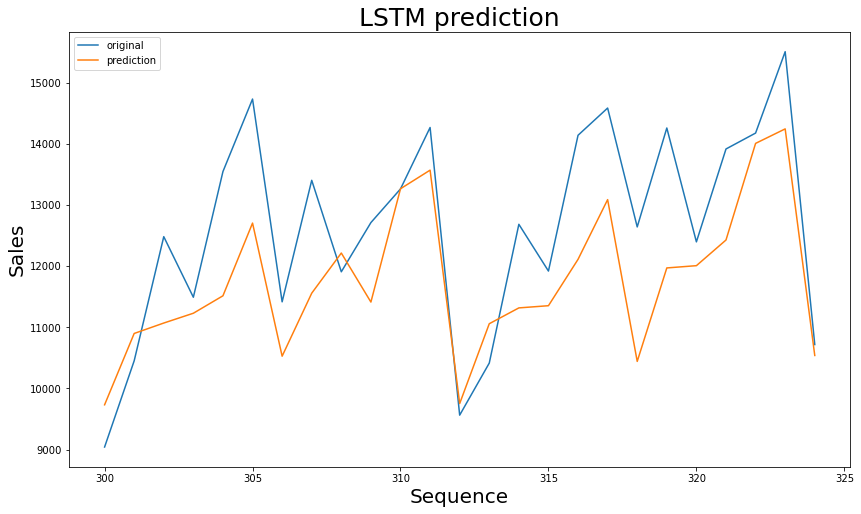

In [28]:
import matplotlib.pyplot as plt

x = range(325)
plt.figure(figsize=(14,8))
plt.plot(df[300:325]['Sales'], label='original')
plt.plot(x[300:325], y_hat, label='prediction')
plt.legend()
plt.xlabel('Sequence', fontsize=20)
plt.ylabel('Sales', fontsize=20)
plt.title('LSTM prediction', fontsize=25)

In [29]:
model.evaluate(test_input, test_label)

1/1 [==============================] - 0s 23ms/step - loss: 0.0846 - mae: 0.2391


[0.08456072956323624, 0.23914383351802826]